In [10]:
import pandas as pd
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from UKMovementSensing import hsmm

In [19]:
execfile('workflow/config.py')

In [20]:
# Import data with states
filenames = os.listdir(states_path_model)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(states_path_model,fn))]
datasets = [pd.read_csv(os.path.join(states_path_model,fn), encoding='utf-8', index_col='timestamp', parse_dates=True) for fn in filenames]

print(states_path_model, len(datasets))

/media/sf_VBox_Shared/London/raw/4am_only/datawithstates/model4variables_4states.pkl 135


In [14]:
from matplotlib.colors import LinearSegmentedColormap
# One more than the number of states, so we have a color for 'All'
nr_states = 4 #all_data.state.nunique()
colormap, cmap = hsmm.get_color_map(nr_states+1)
cmap_states = LinearSegmentedColormap.from_list('name',
                                             [colormap[i] for i in range(nr_states)],
                                             nr_states)

In [15]:
datasets[i]['filename'][0]

u'__020480_2015-02-13 10-58-01.bin_day2'

We will plot the acceleration for each timeseries, with the corresponding states. Not that state 0 corresponds with low activity, this is the 'resting' state.
In the top of each plot, we show the label in the diary: either sleeping (red) or something else (blue).

We  see that the diary seems to be correct: the red bars usually appear at night. However, they do not correspond with the resting state (where we have visually low acceleration), and there seems to be sometimes high acceleration during the Sleeping activity. Thus, it seems that the time labels of the acceleration are incorrect.

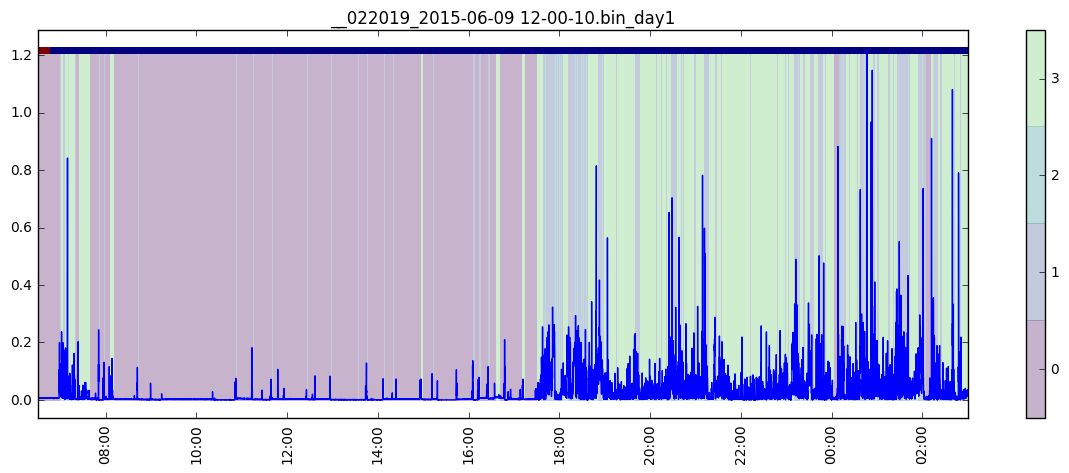

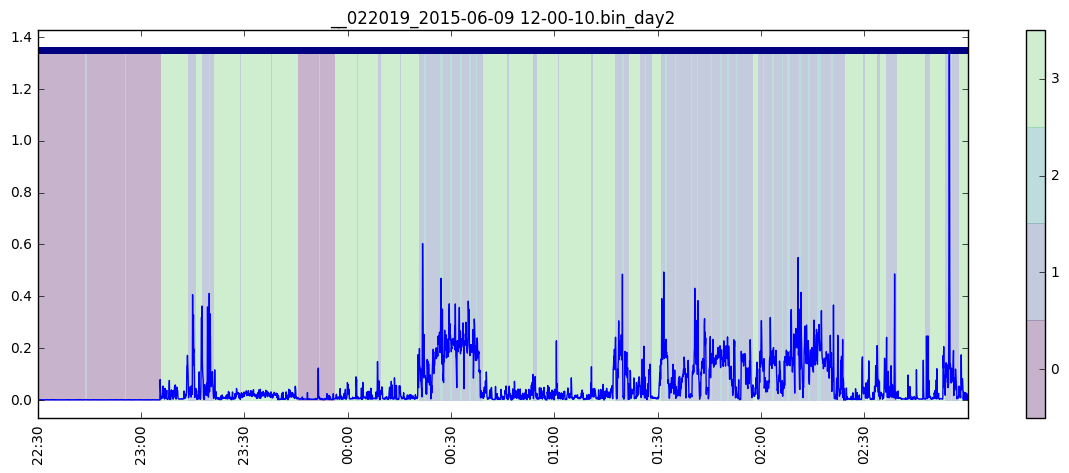

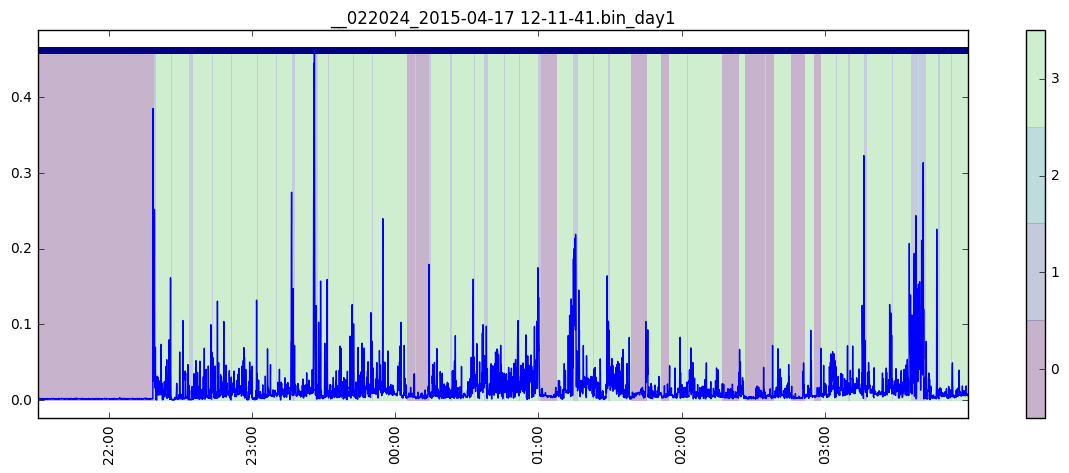

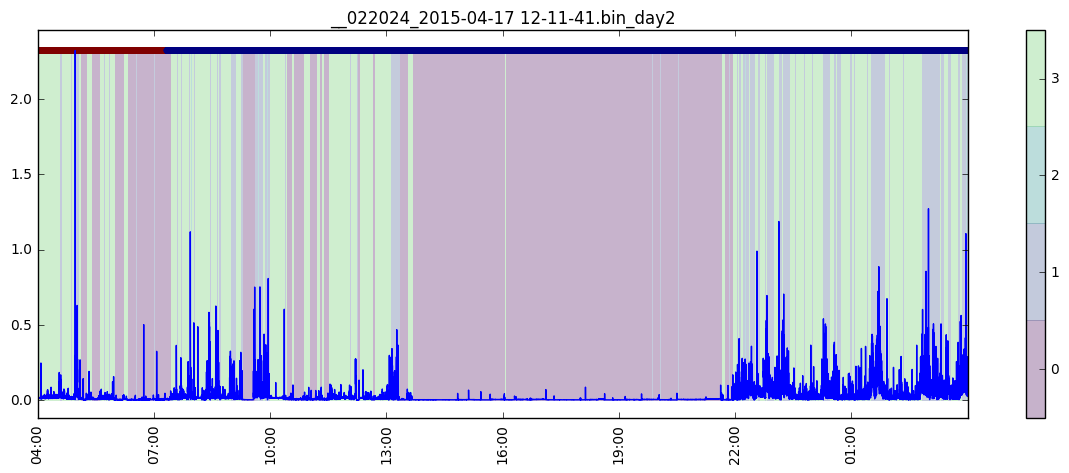

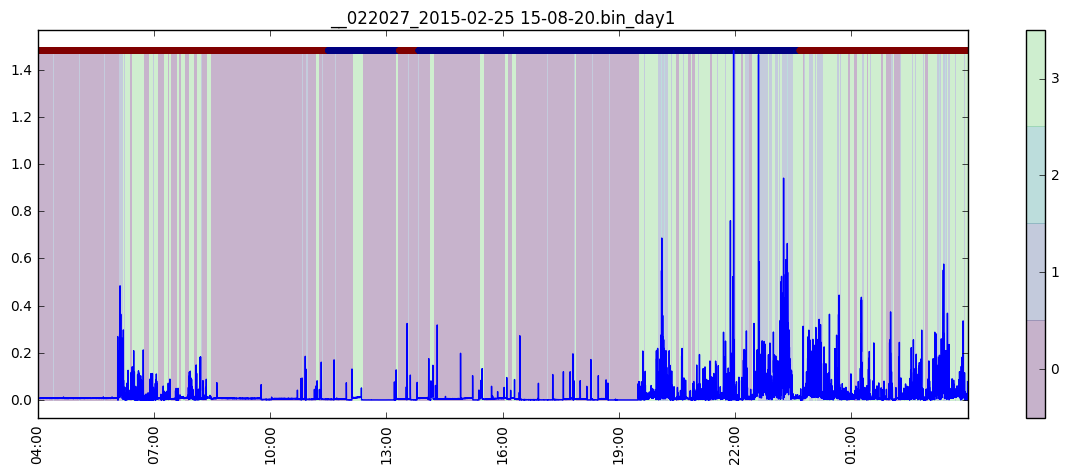

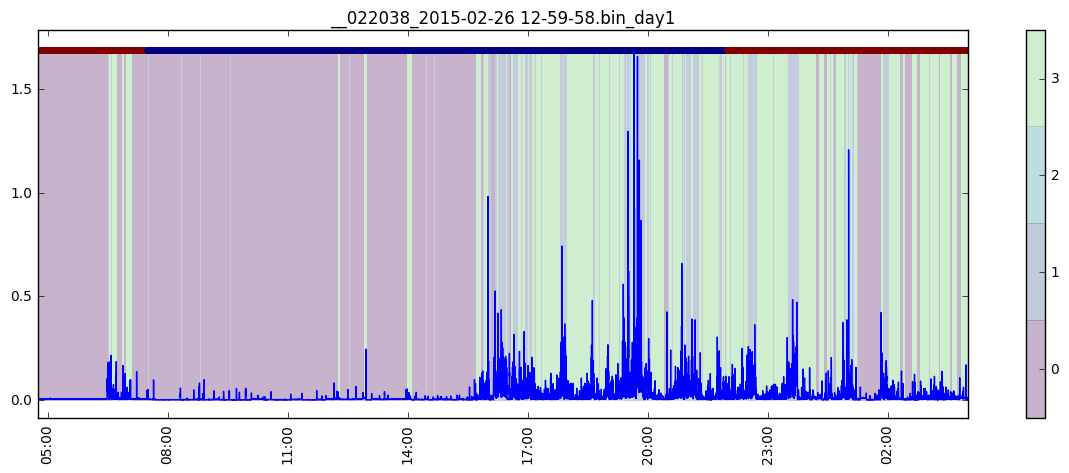

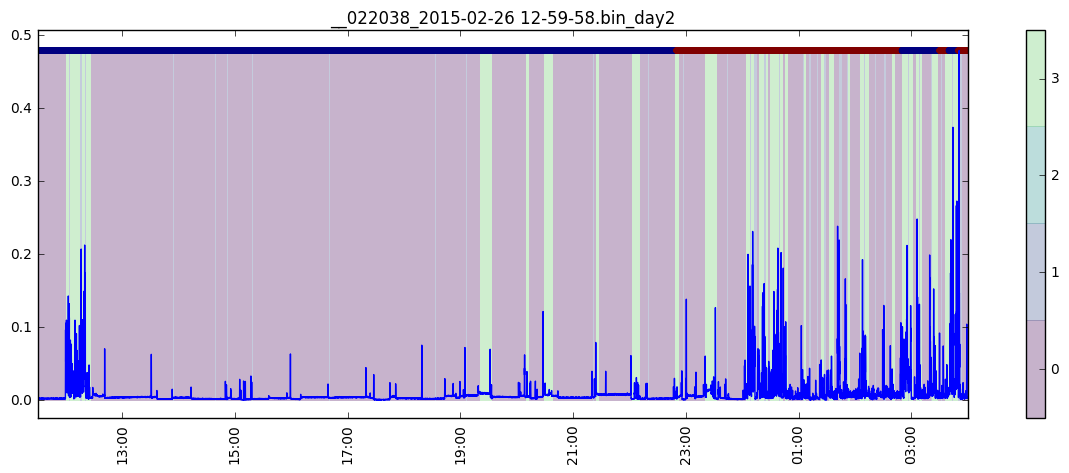

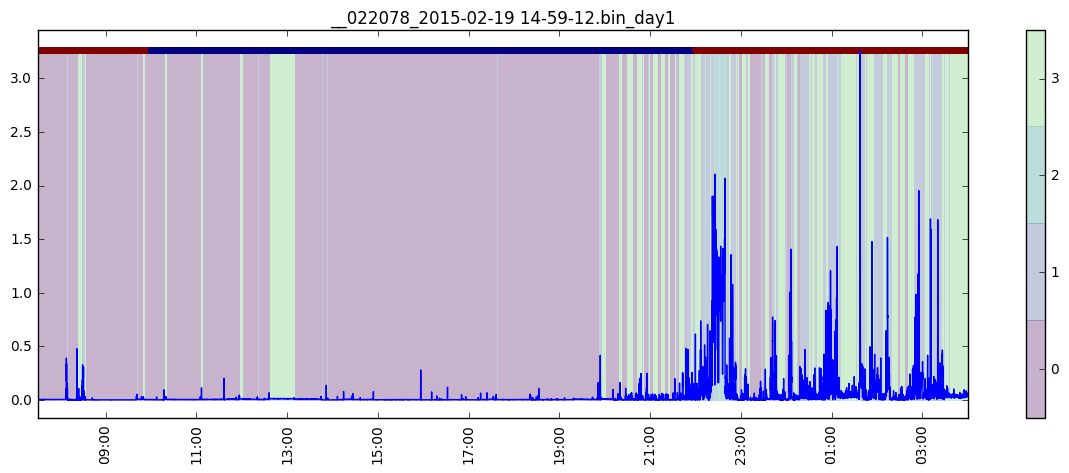

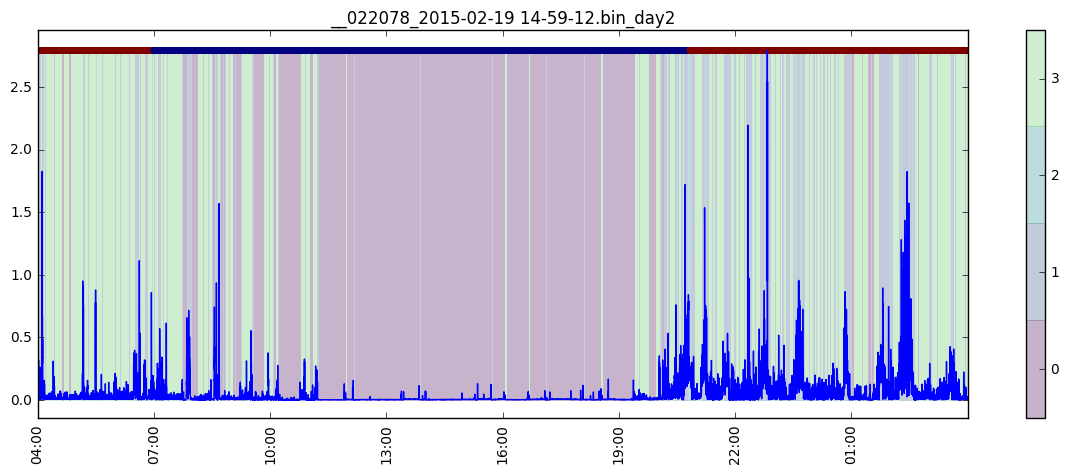

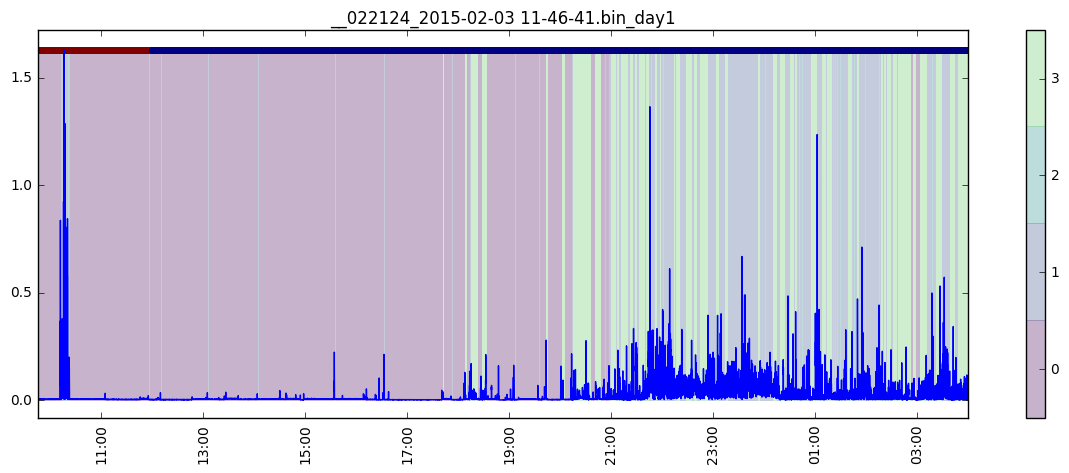

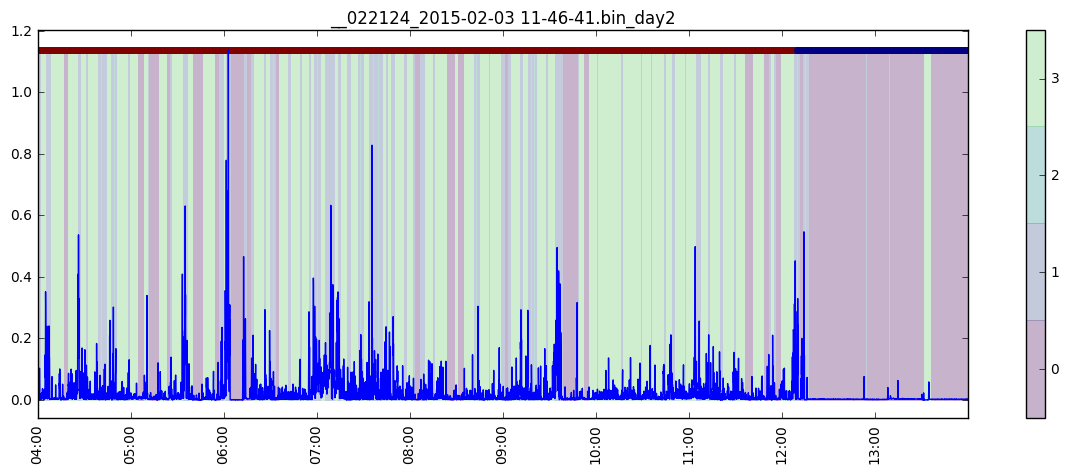

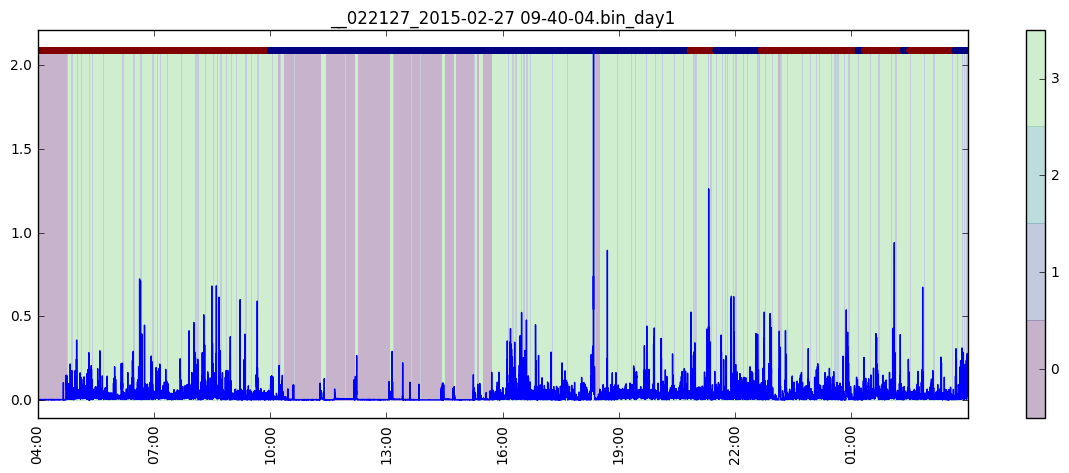

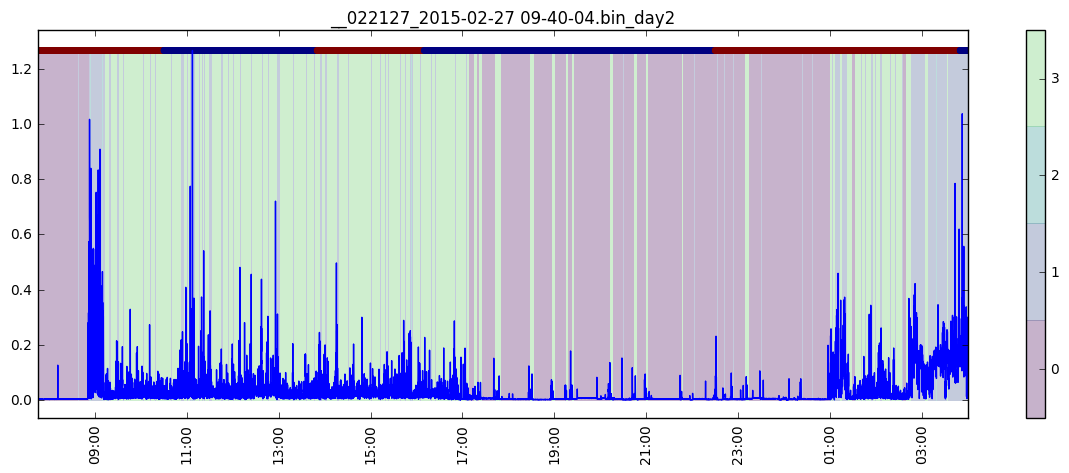

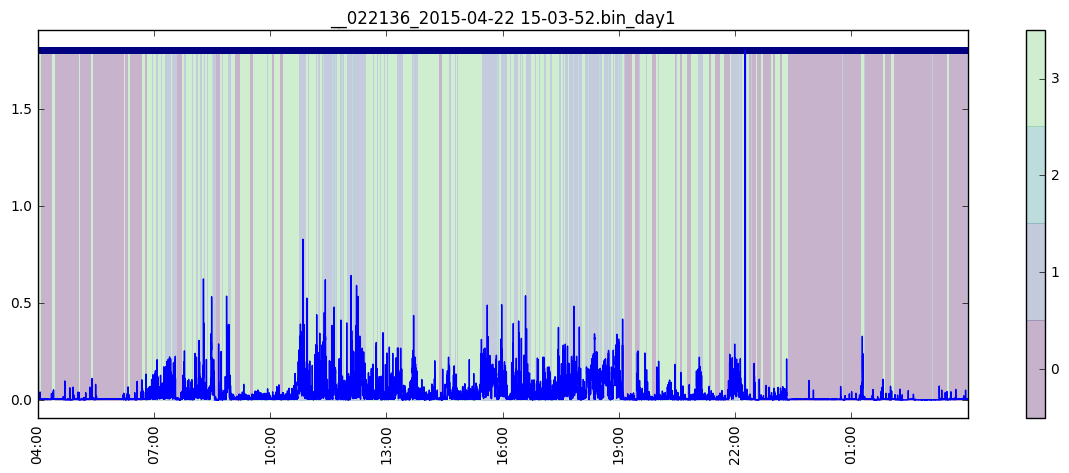

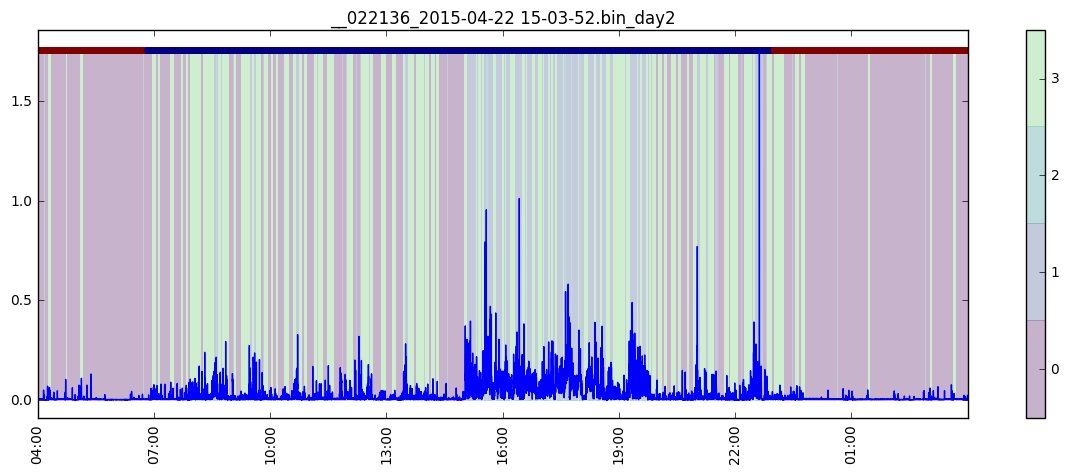

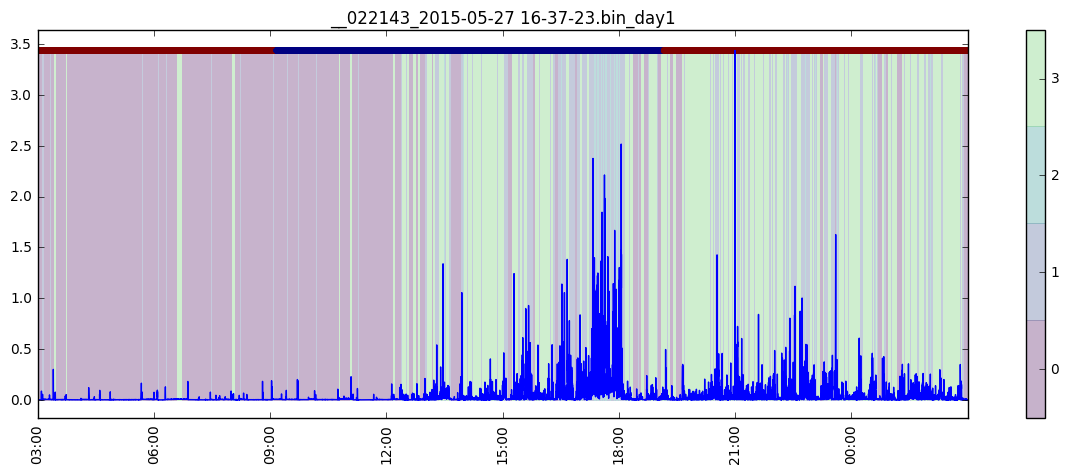

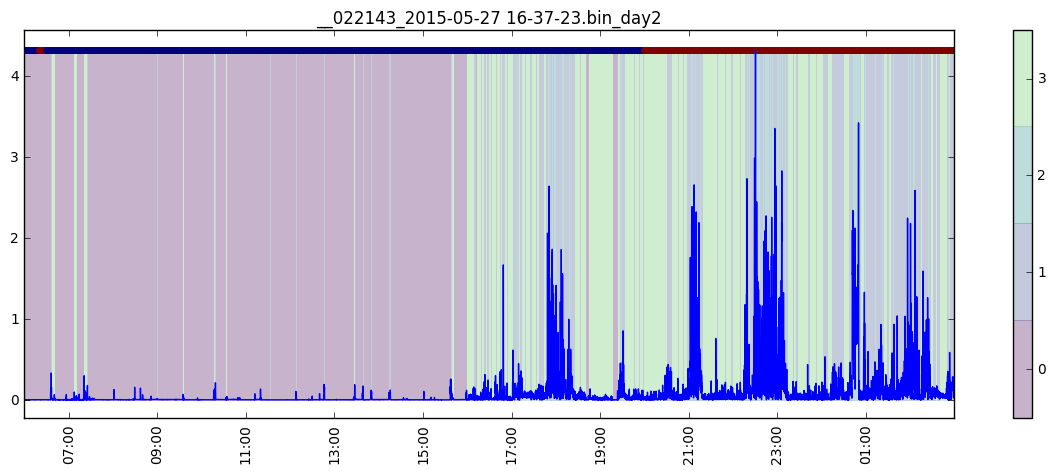

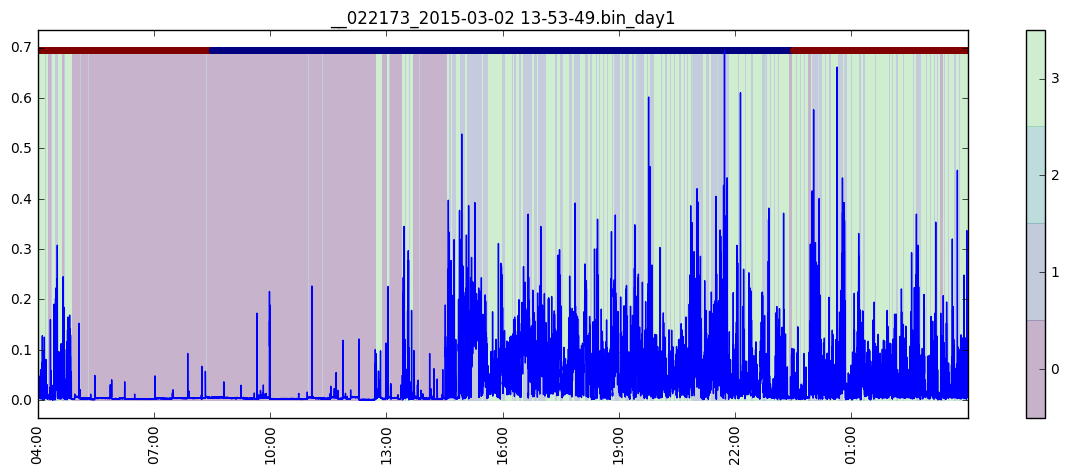

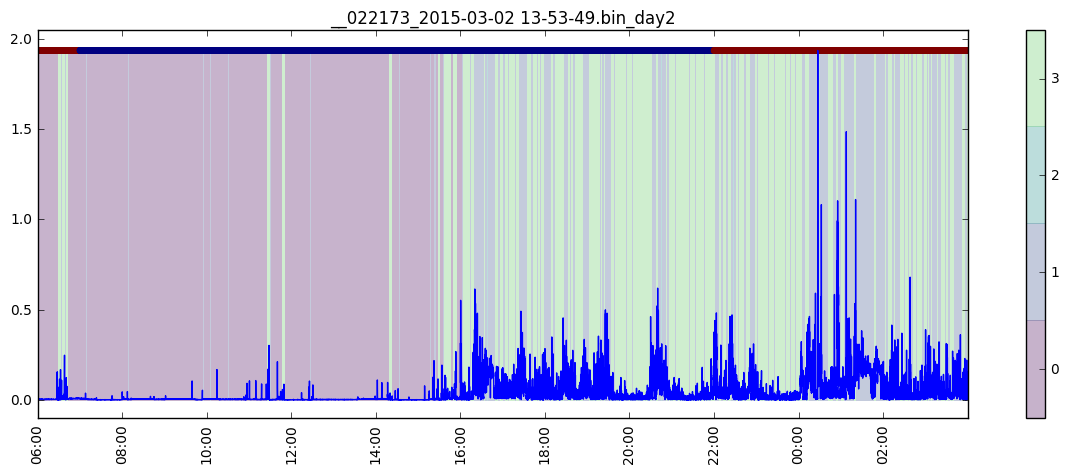

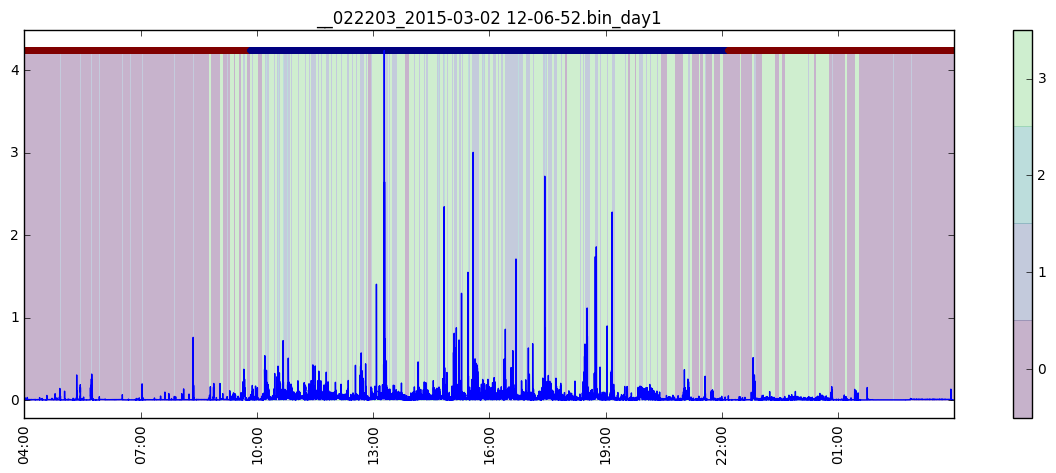

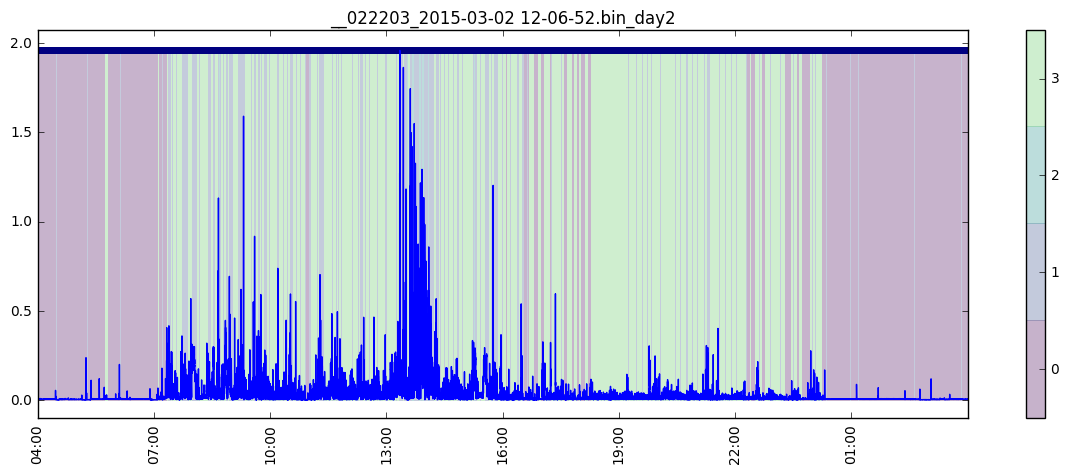

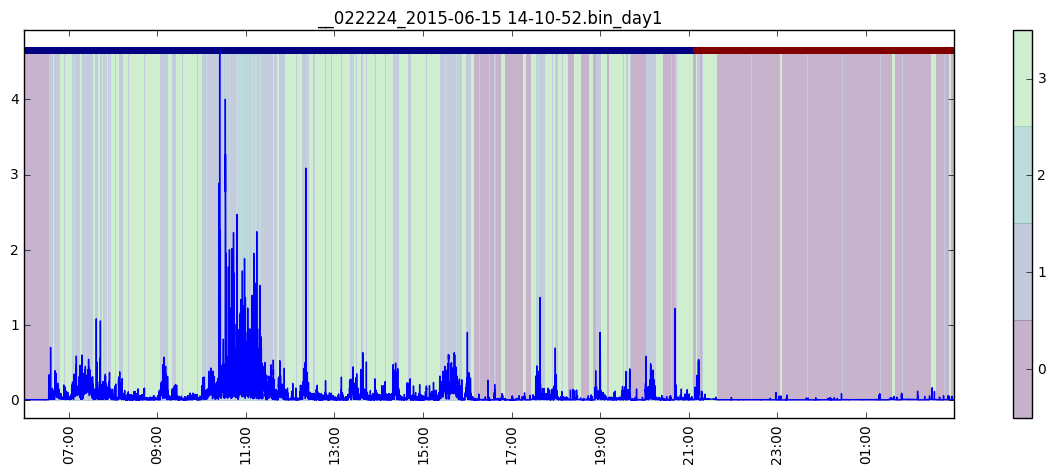

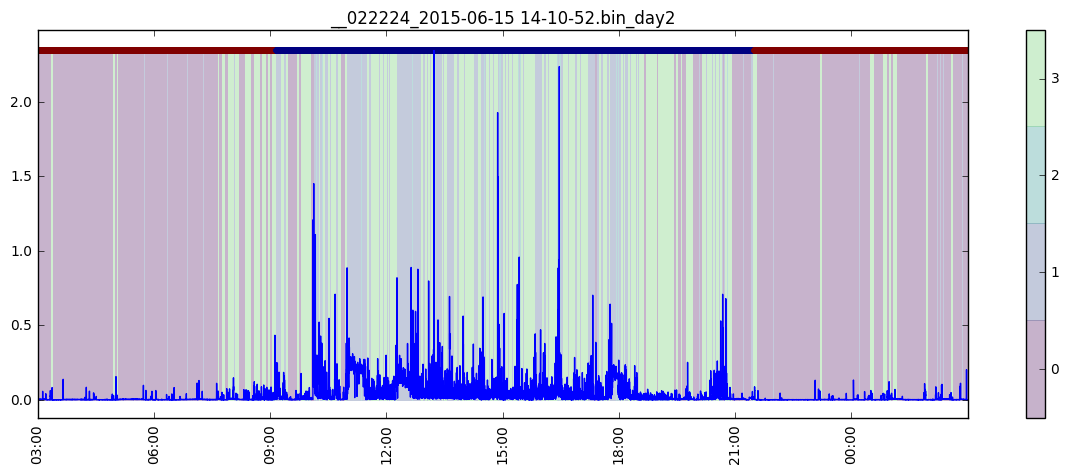

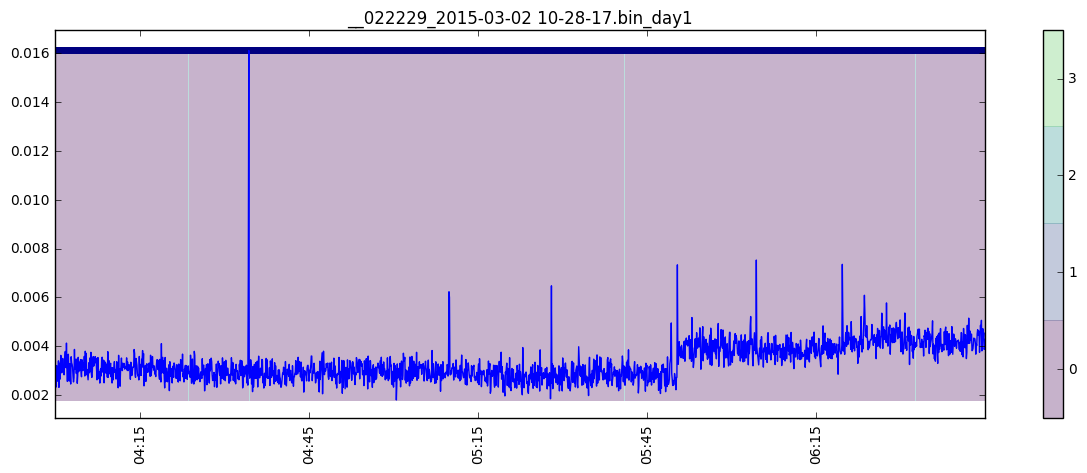

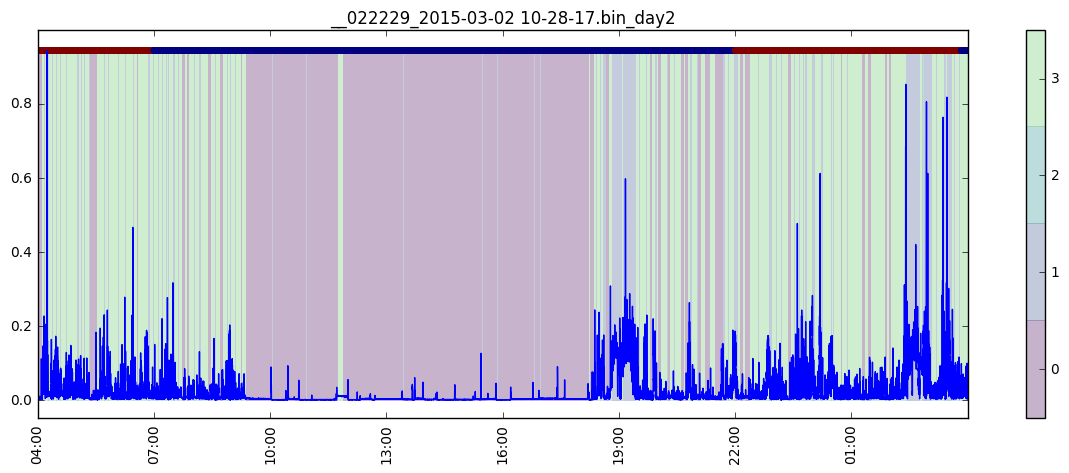

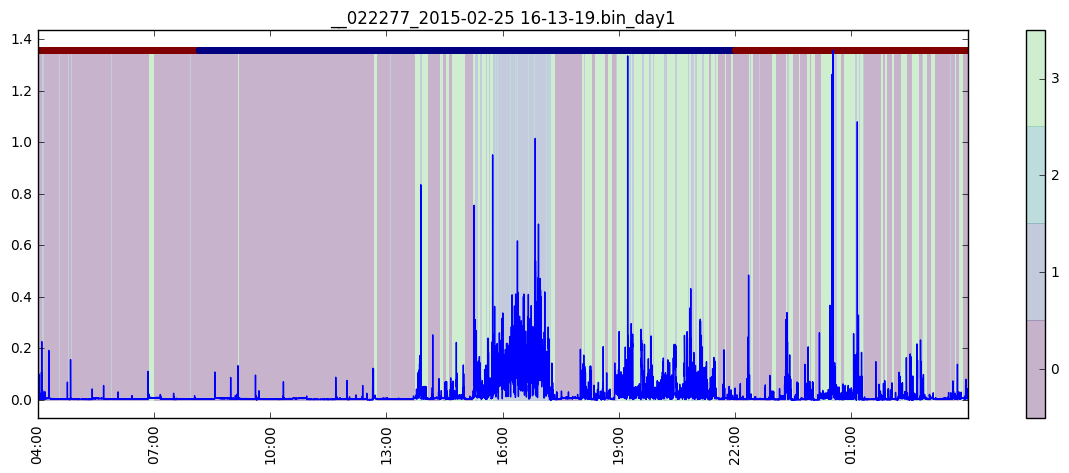

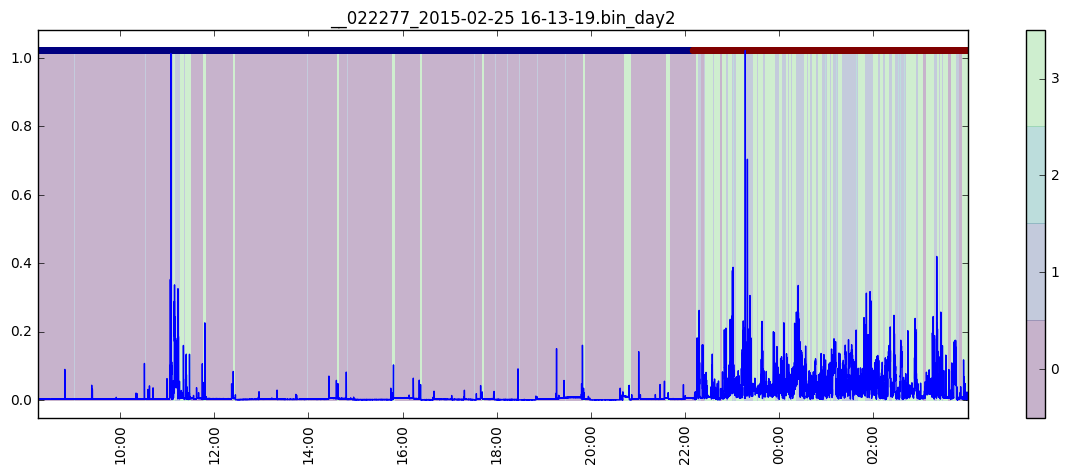

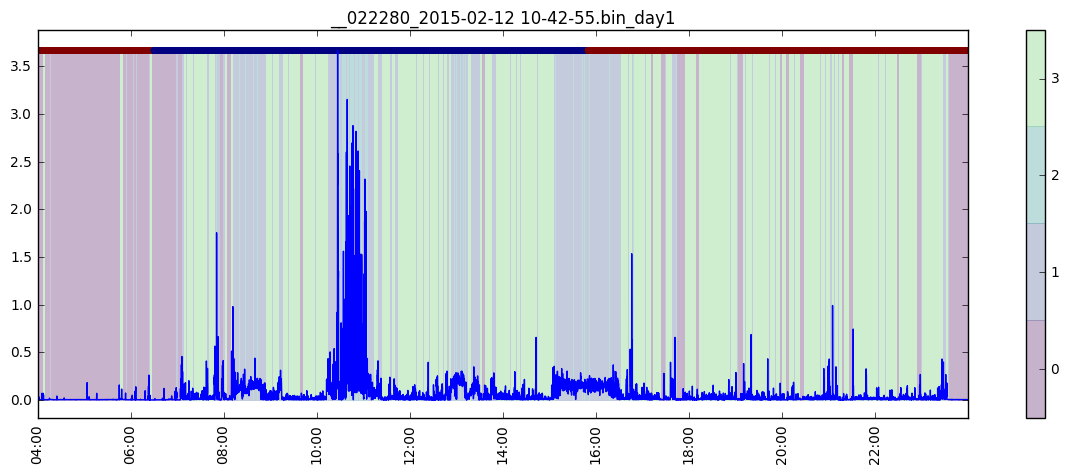

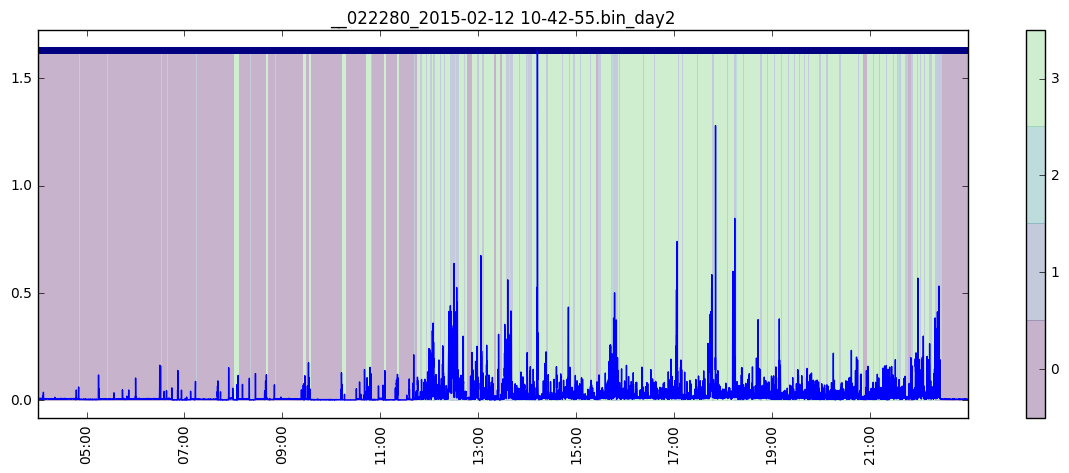

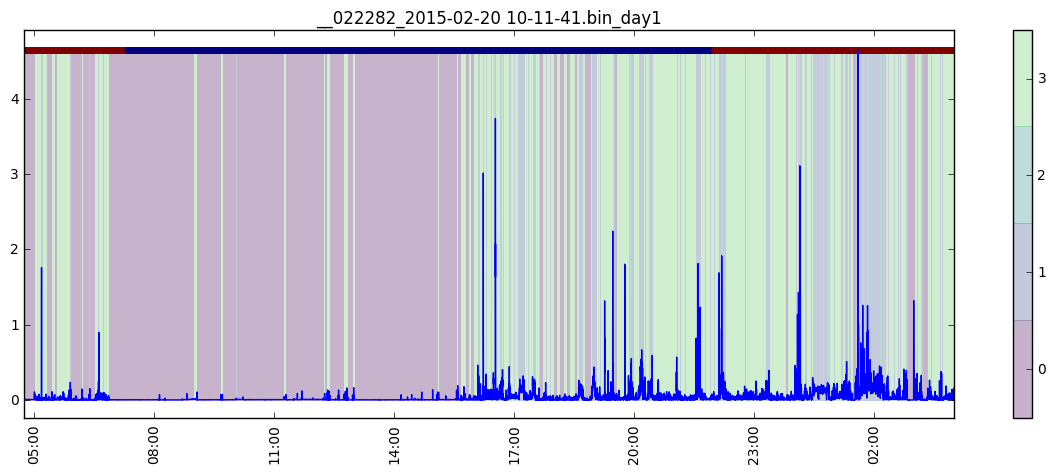

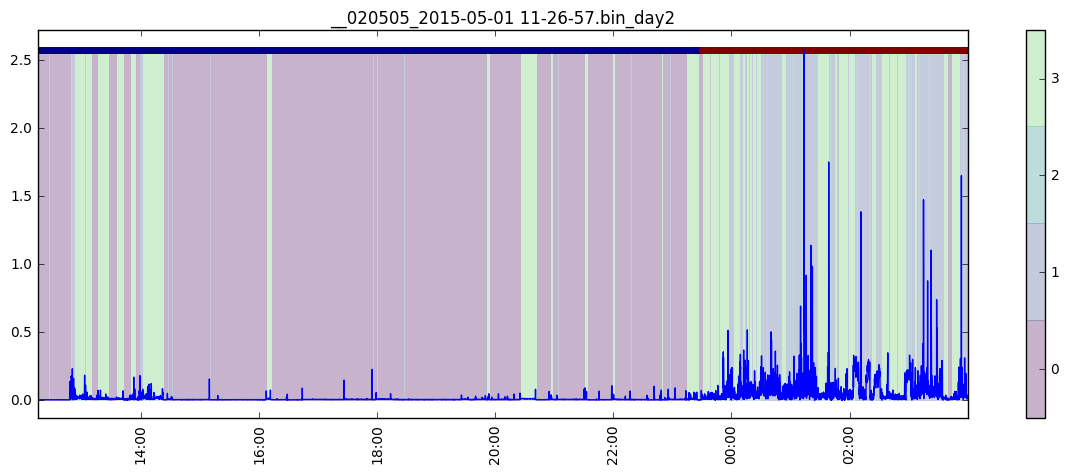

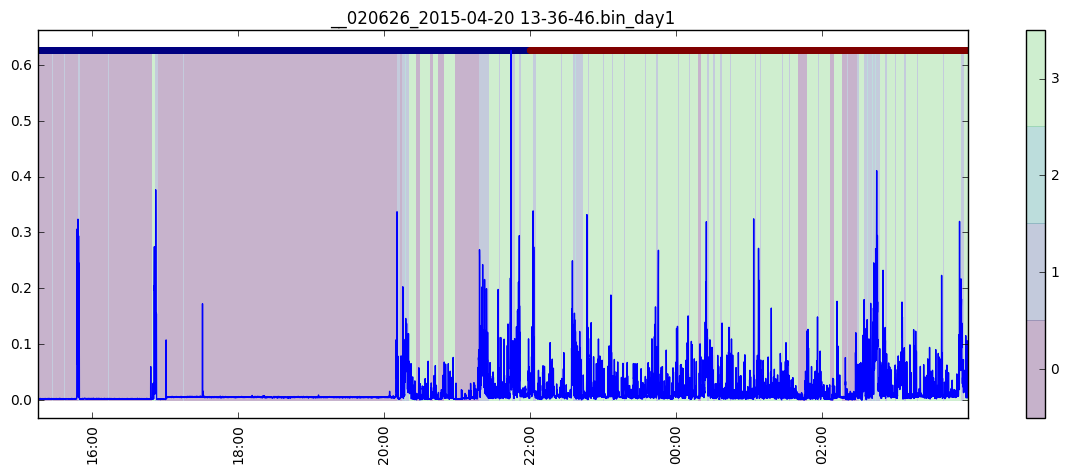

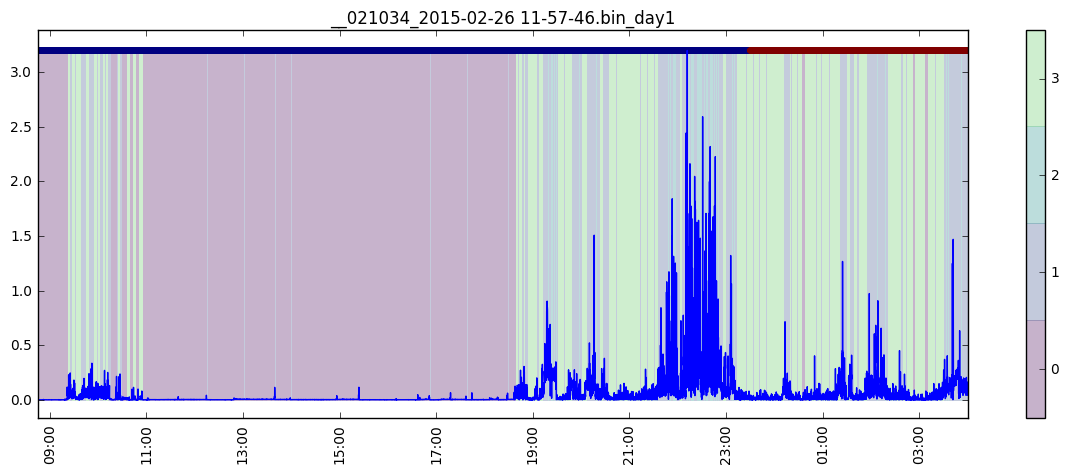

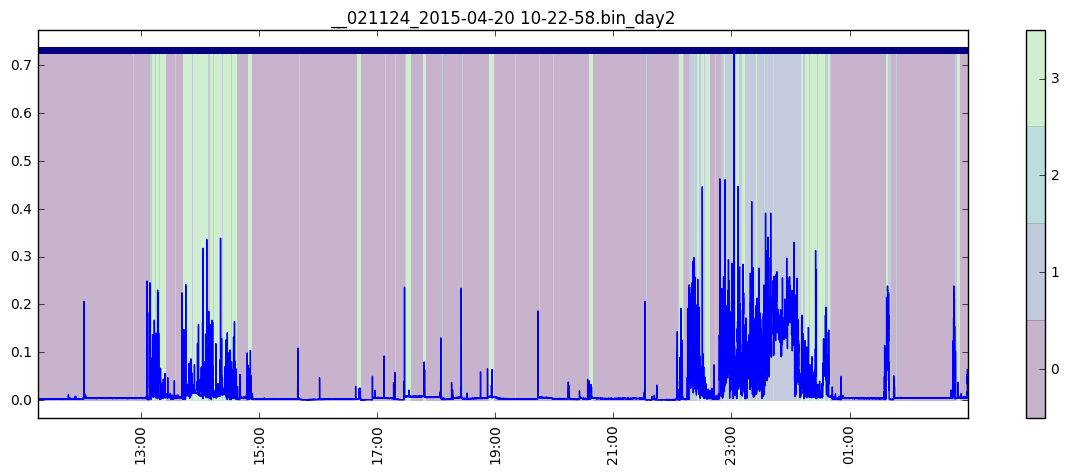

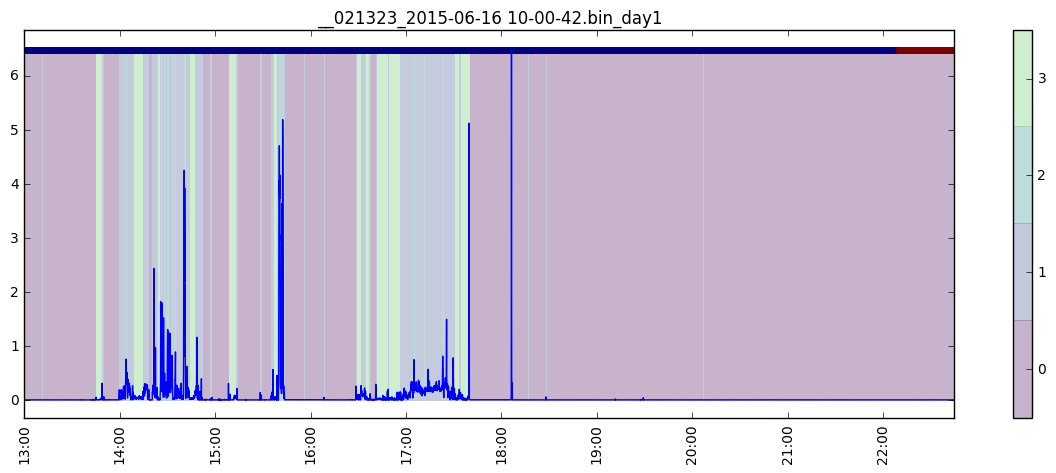

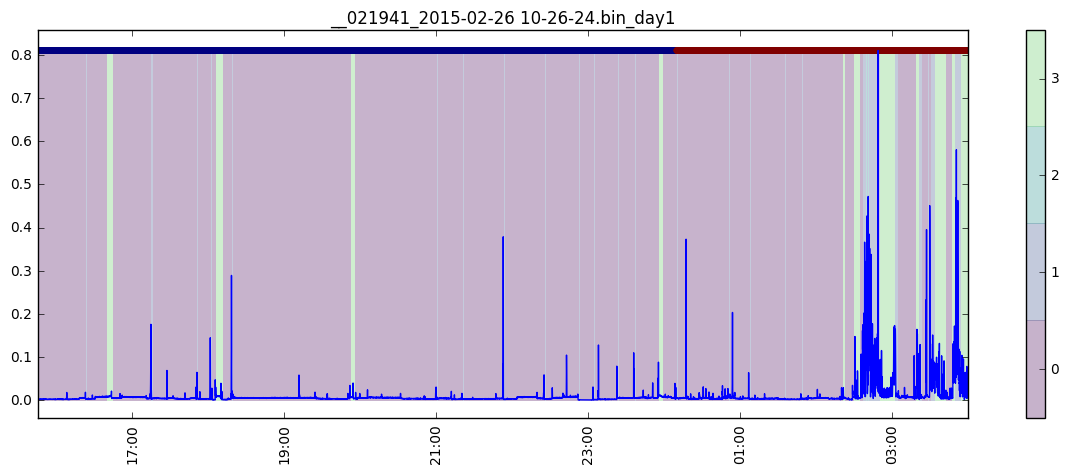

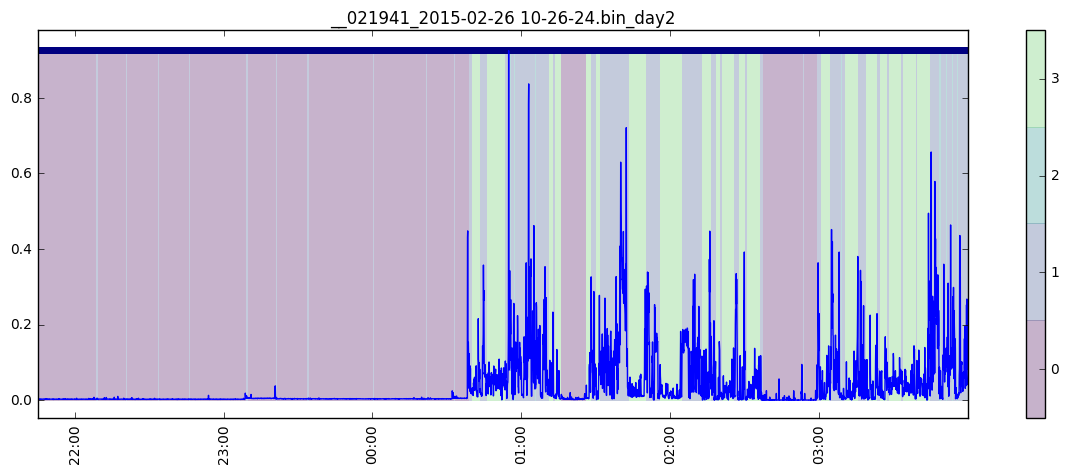

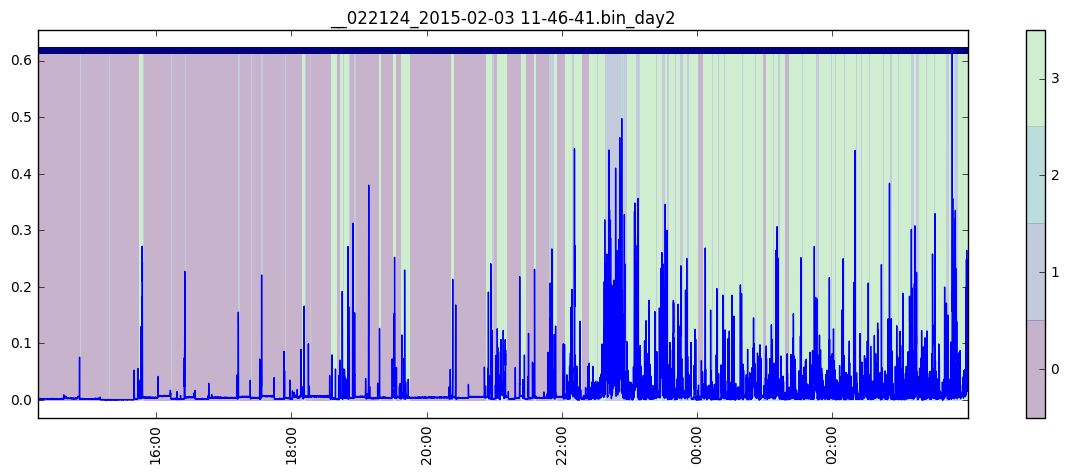

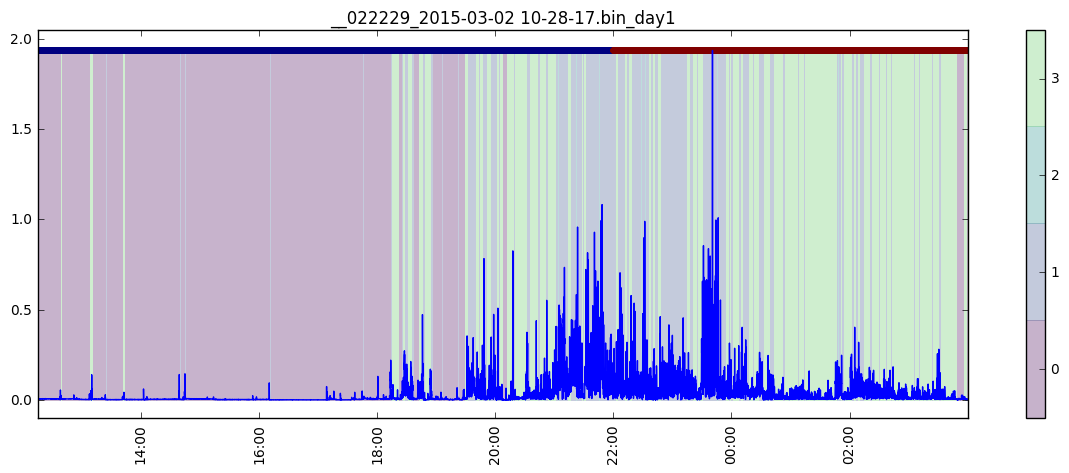

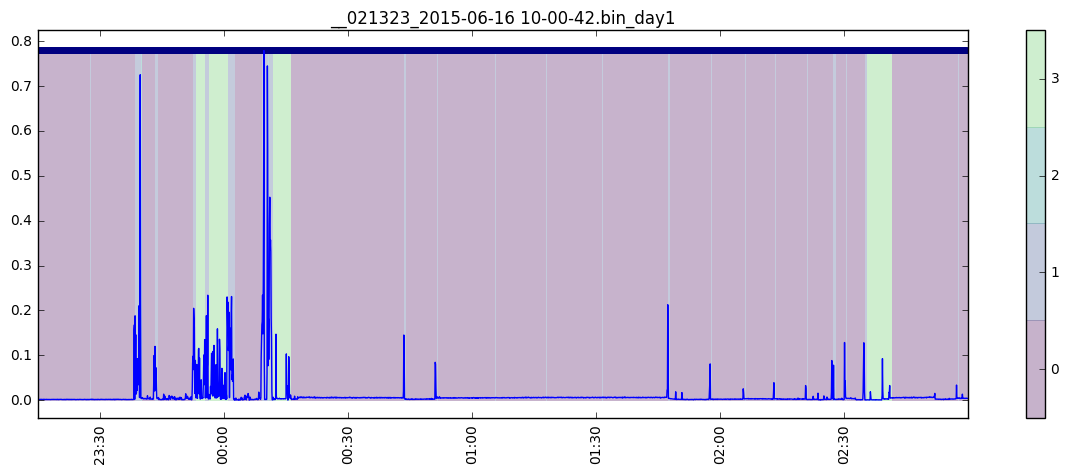

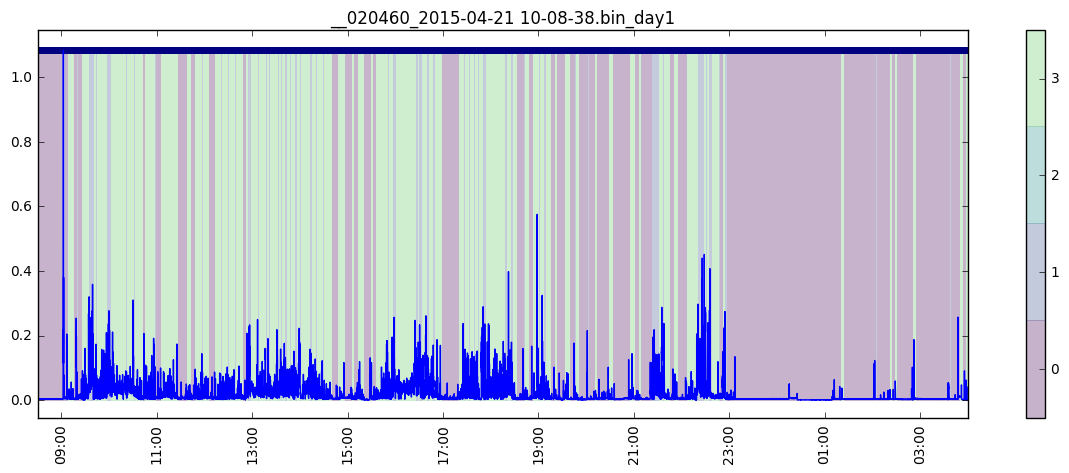

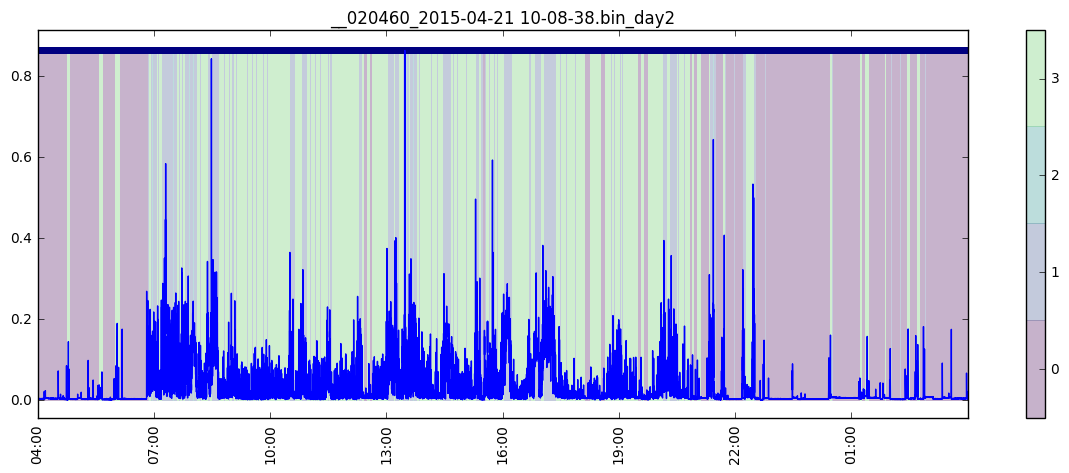

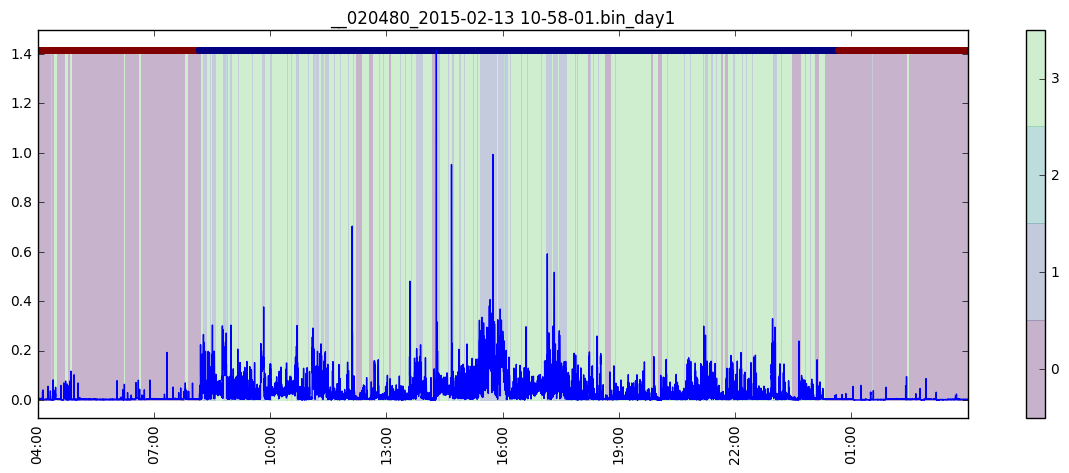

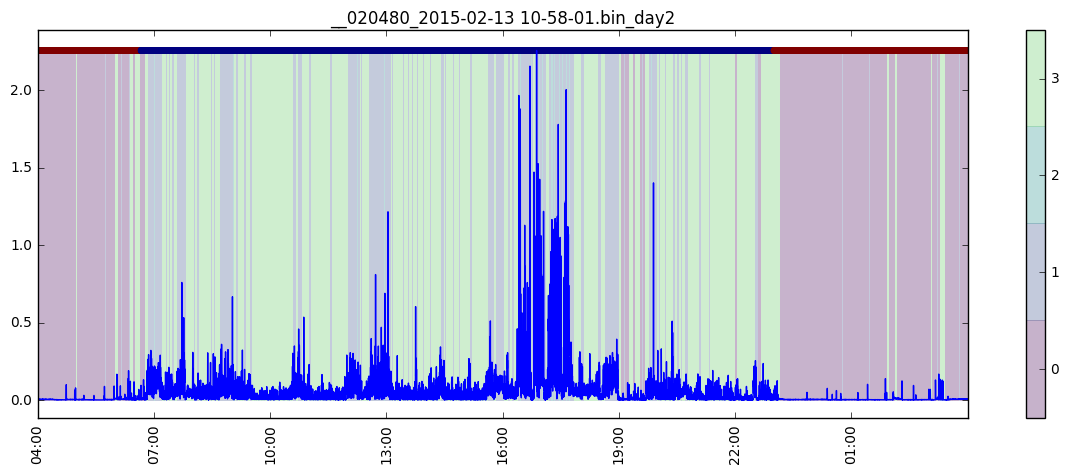

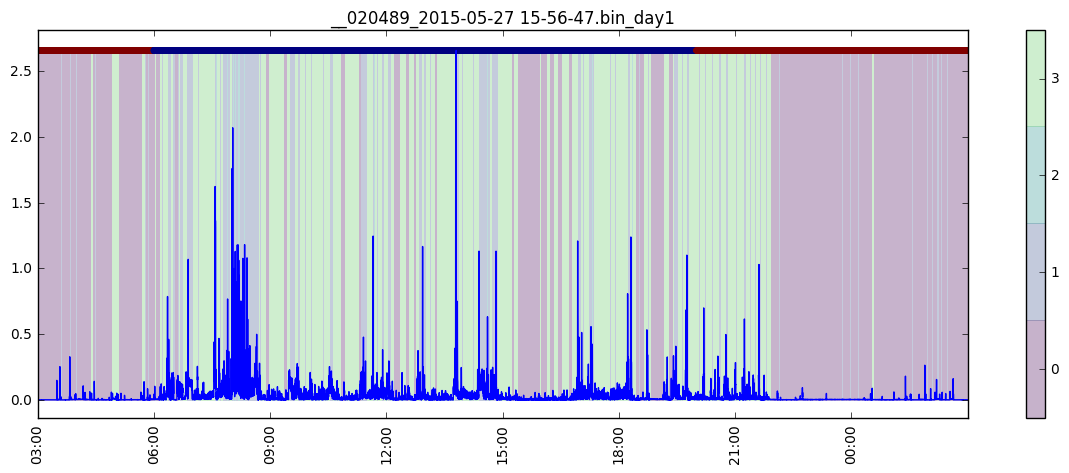

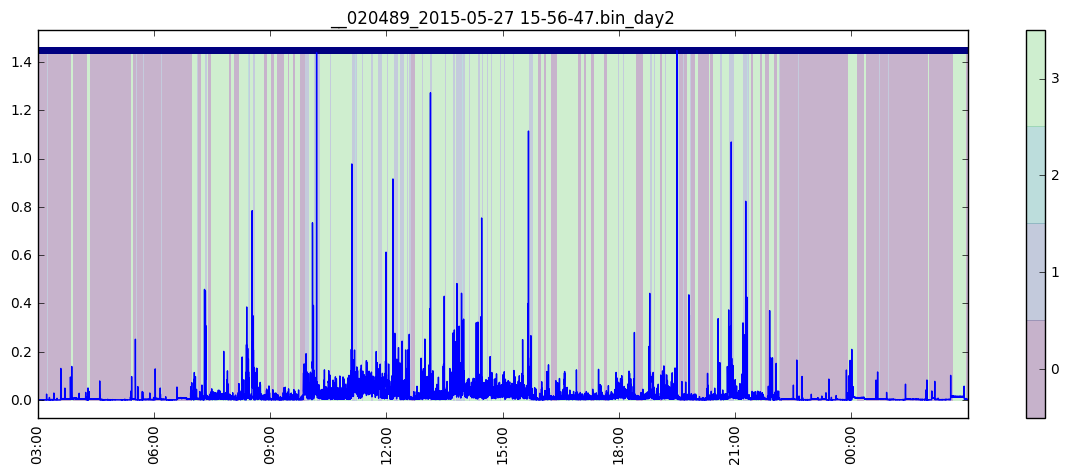

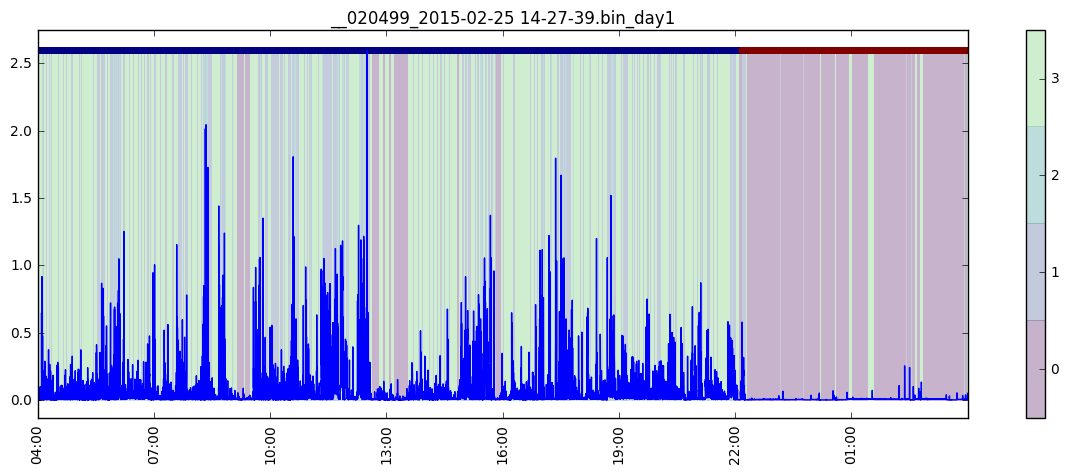

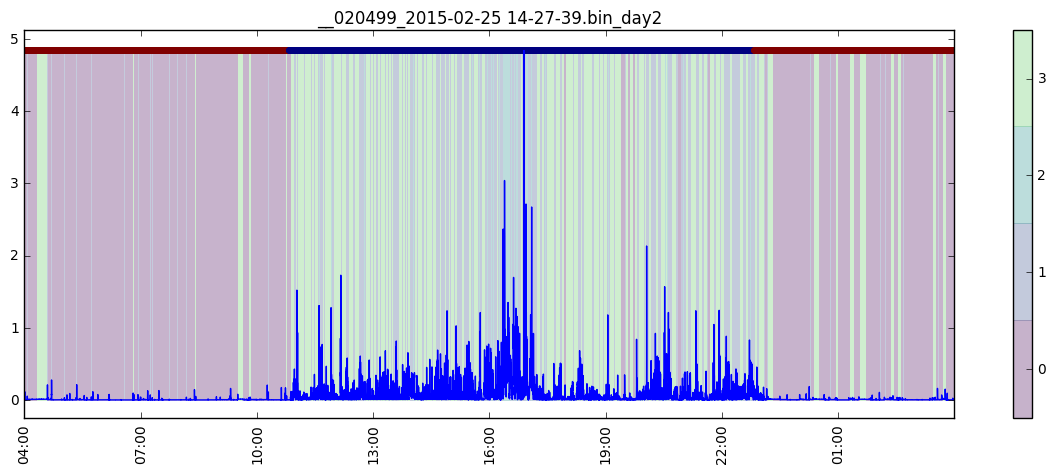

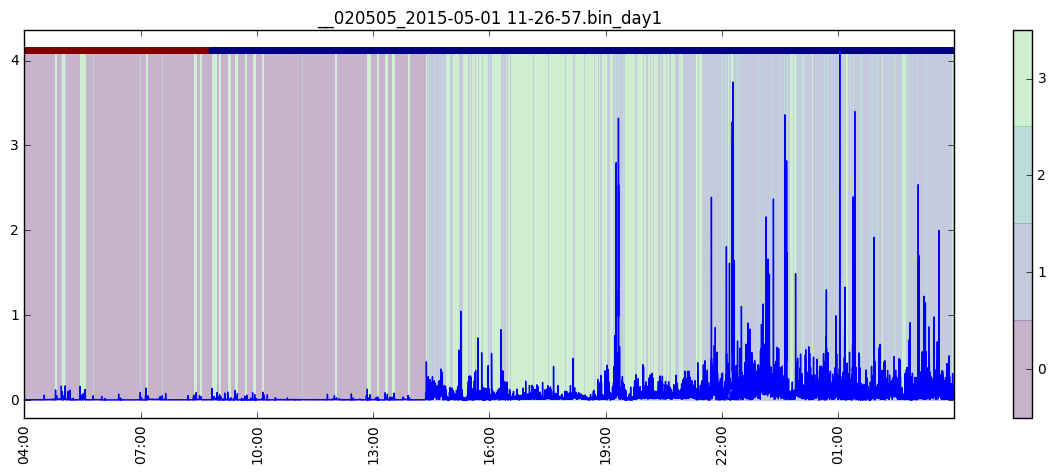

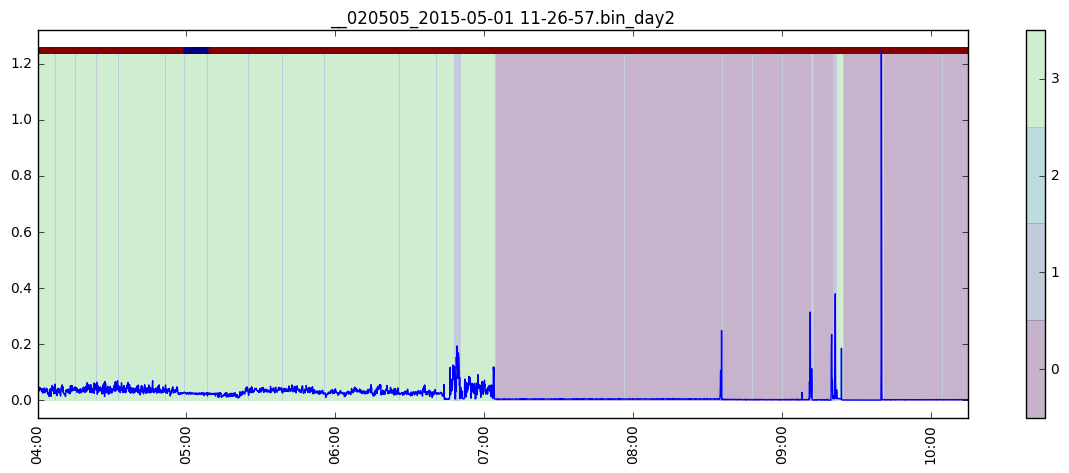

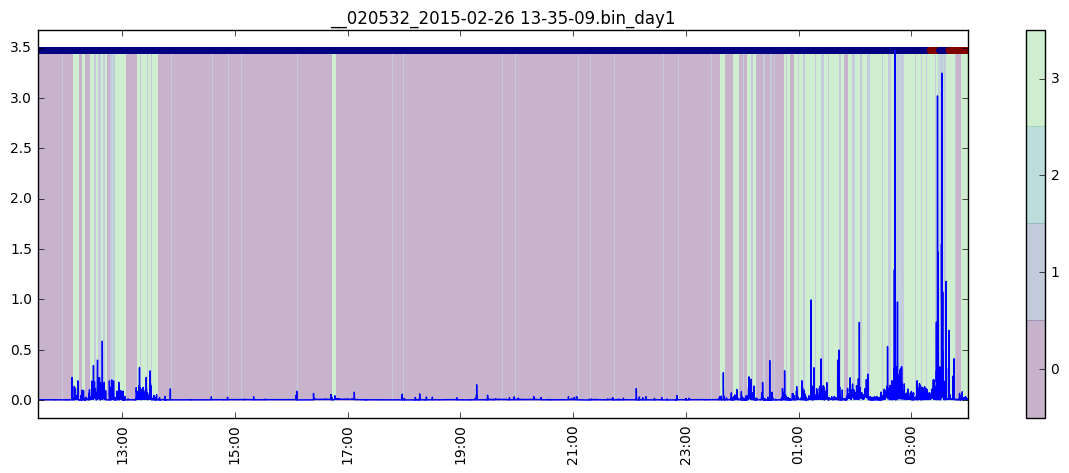

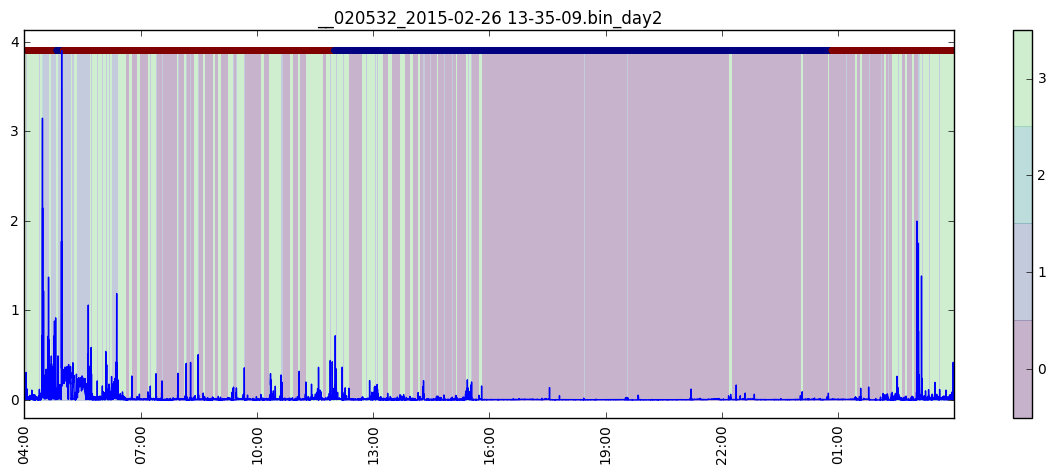

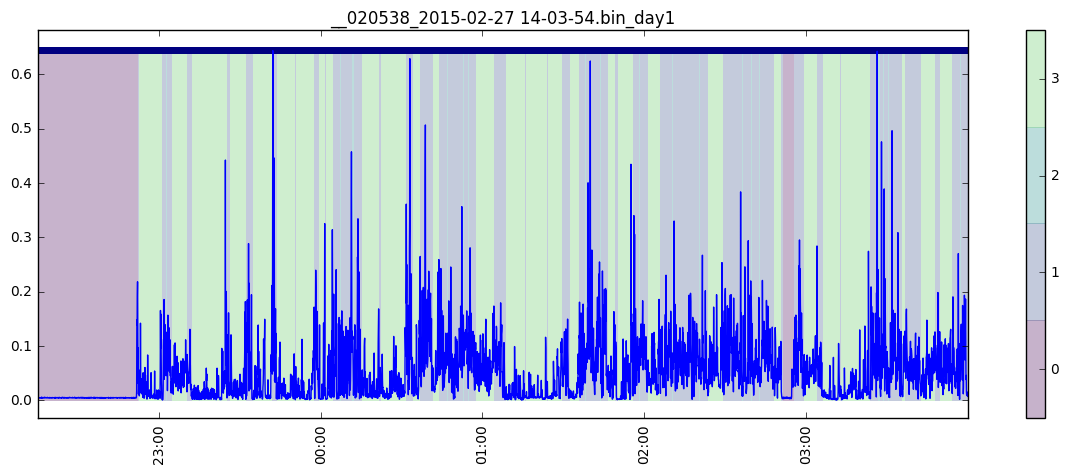

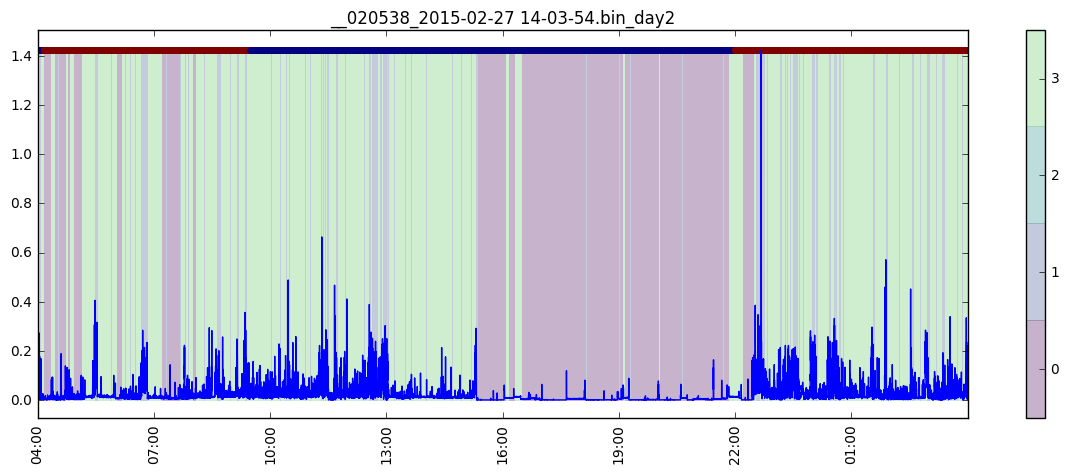

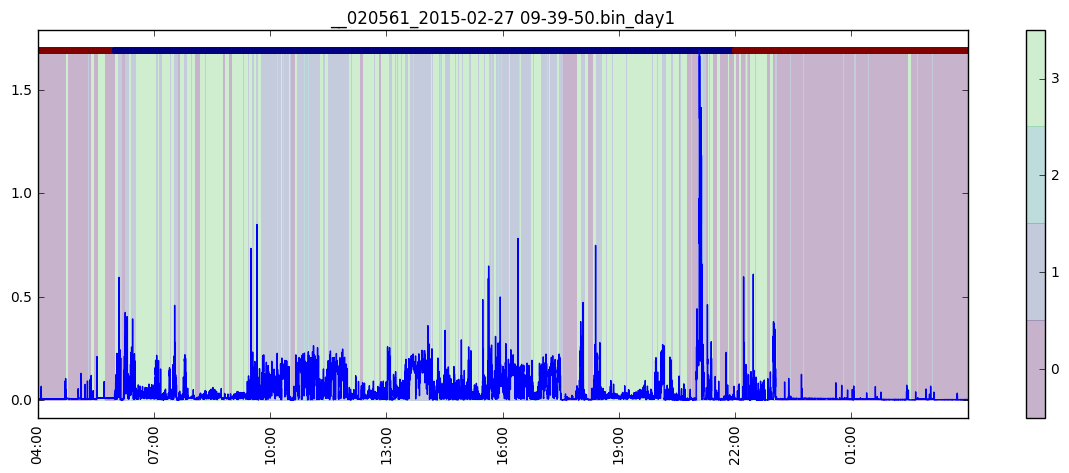

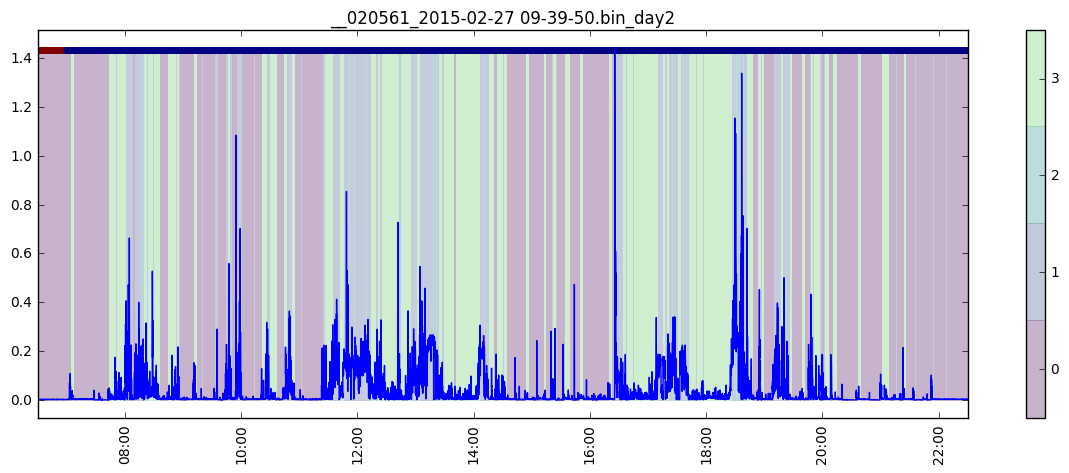

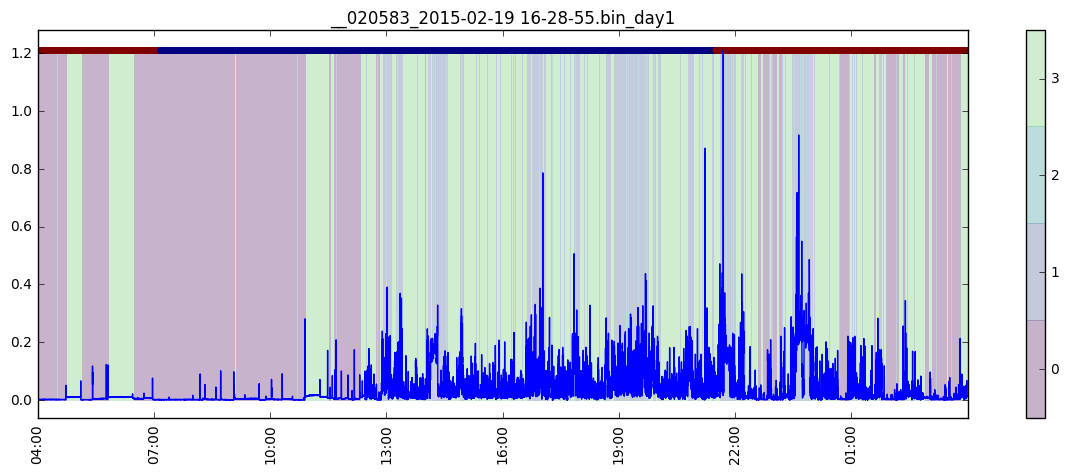

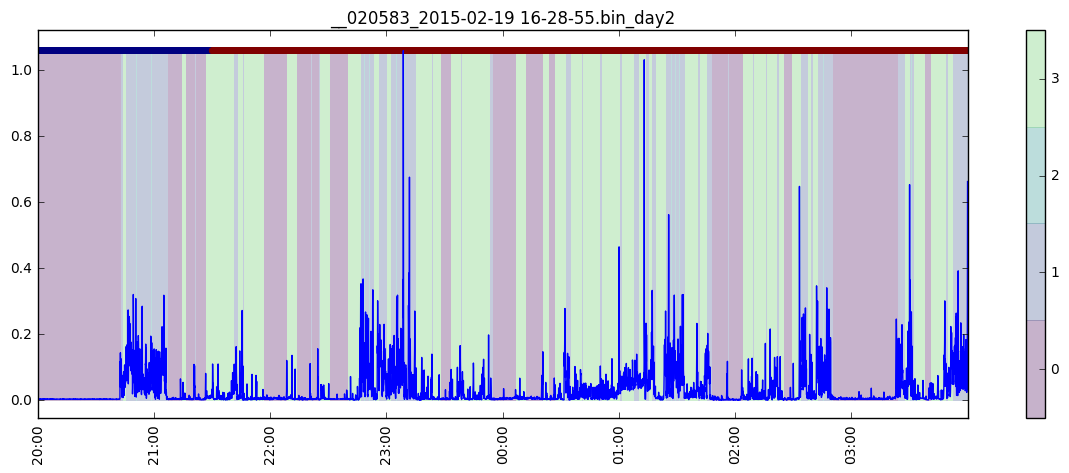

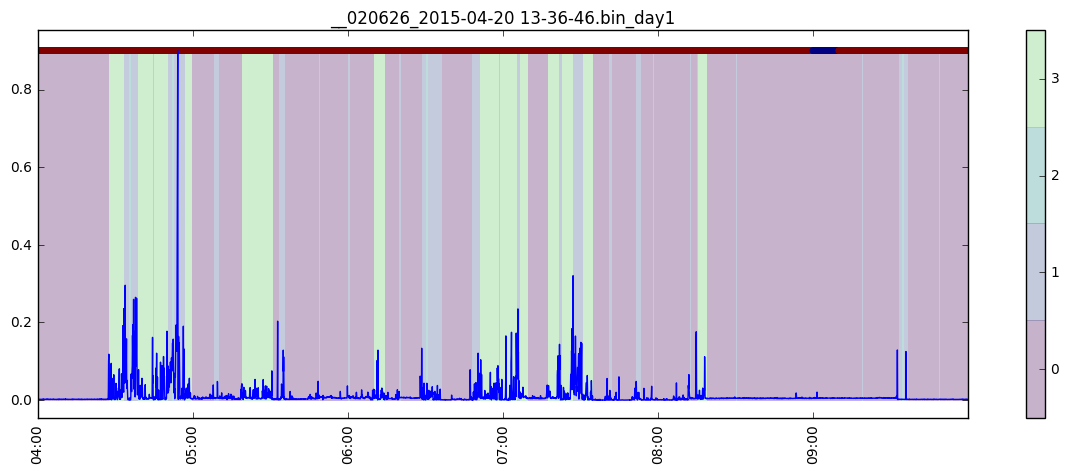

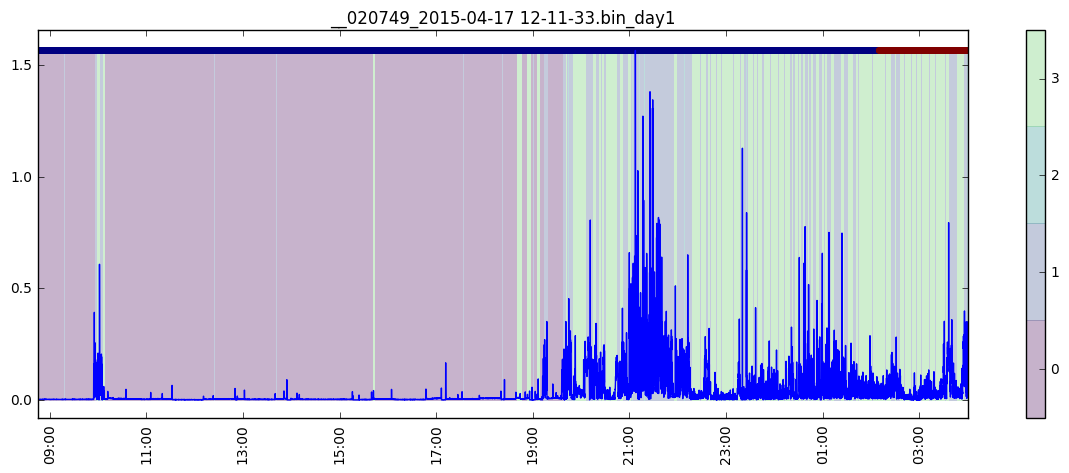

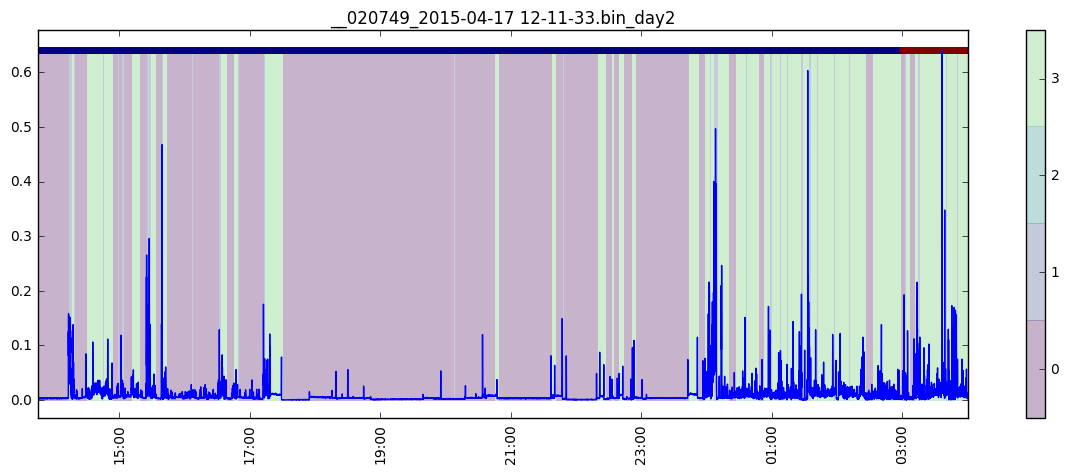

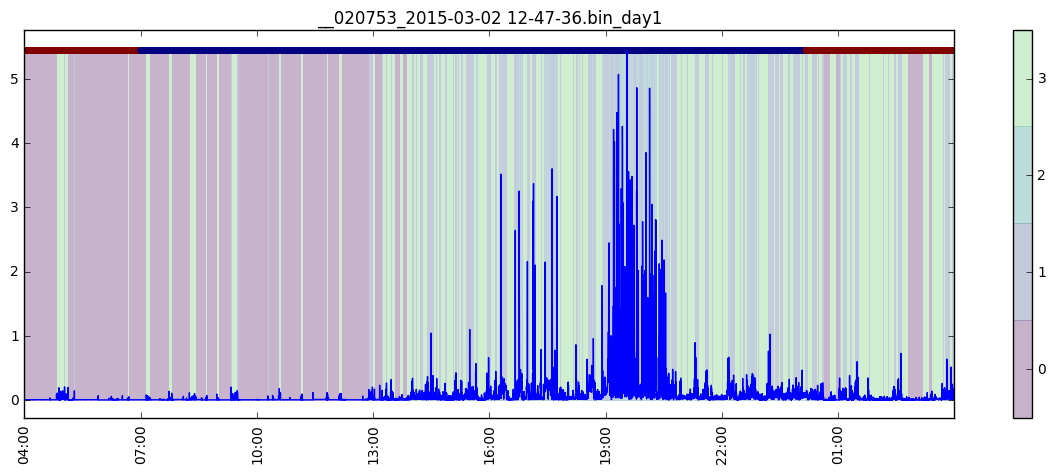

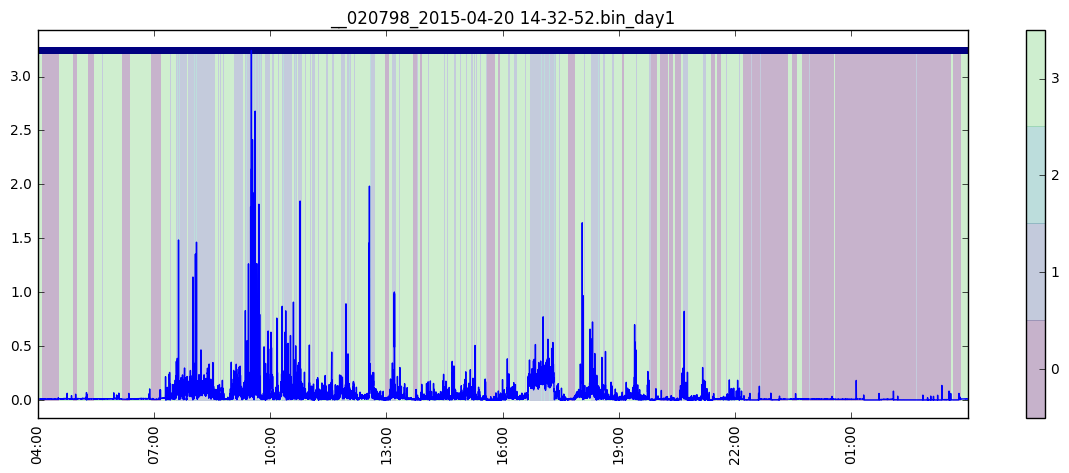

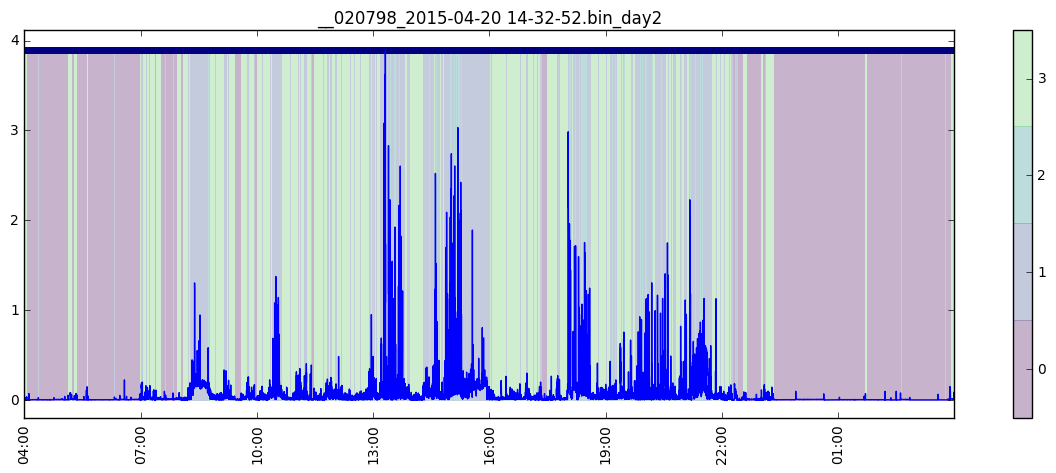

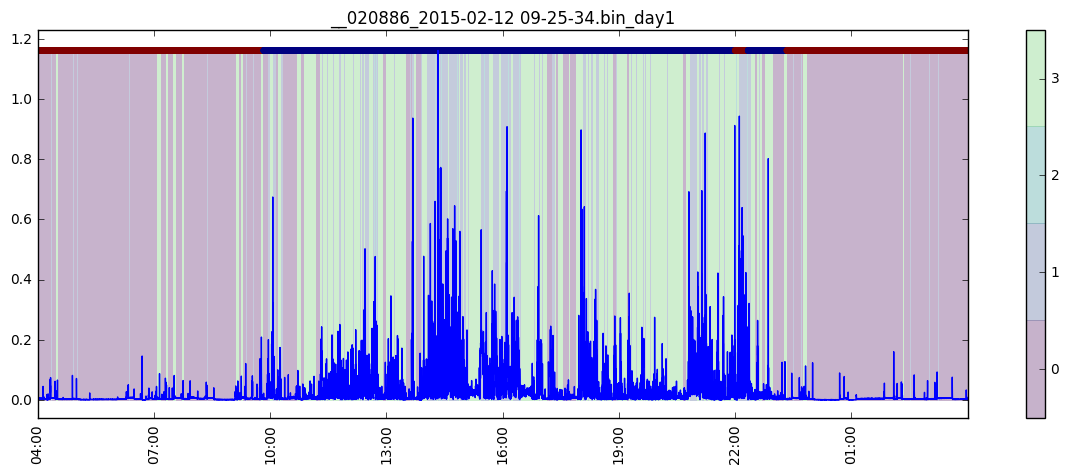

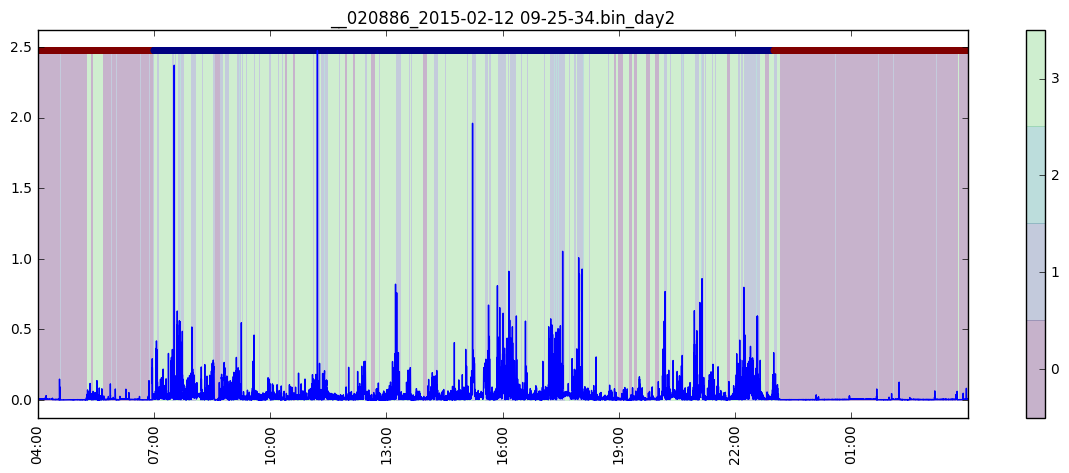

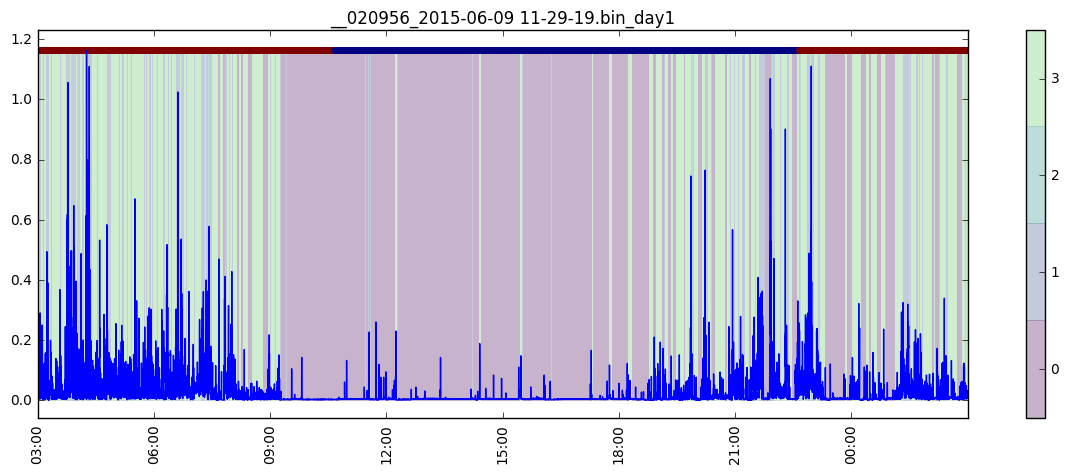

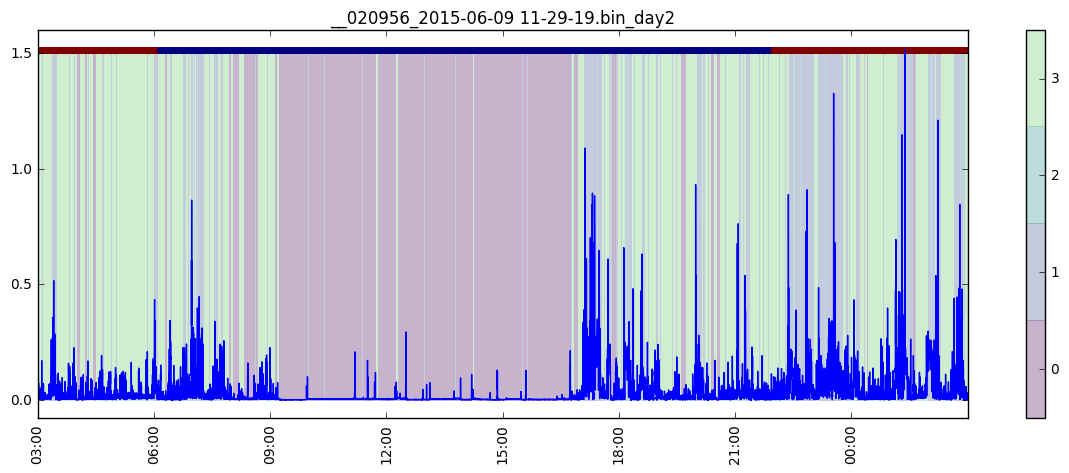

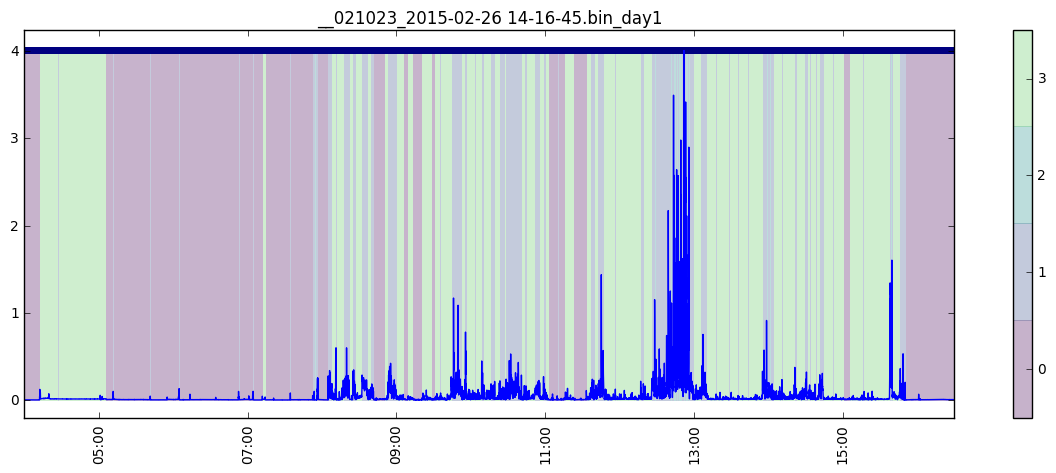

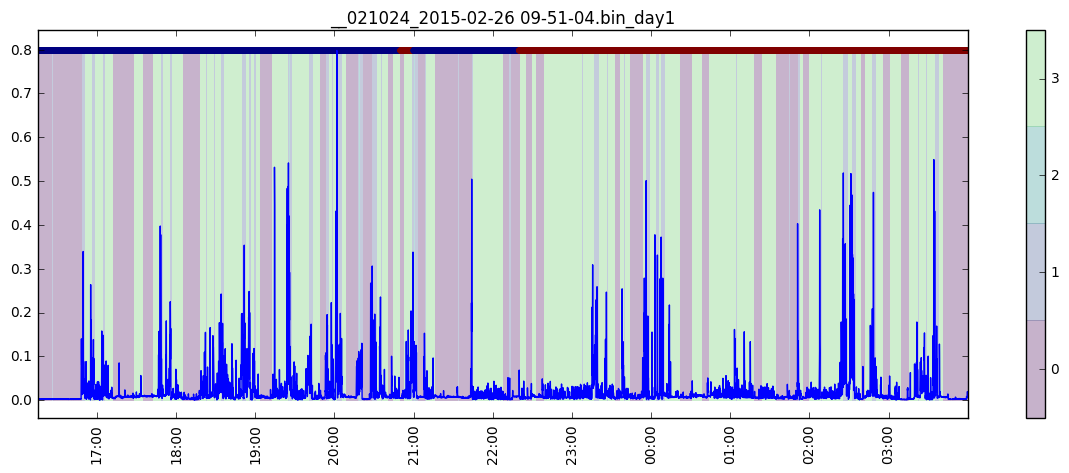

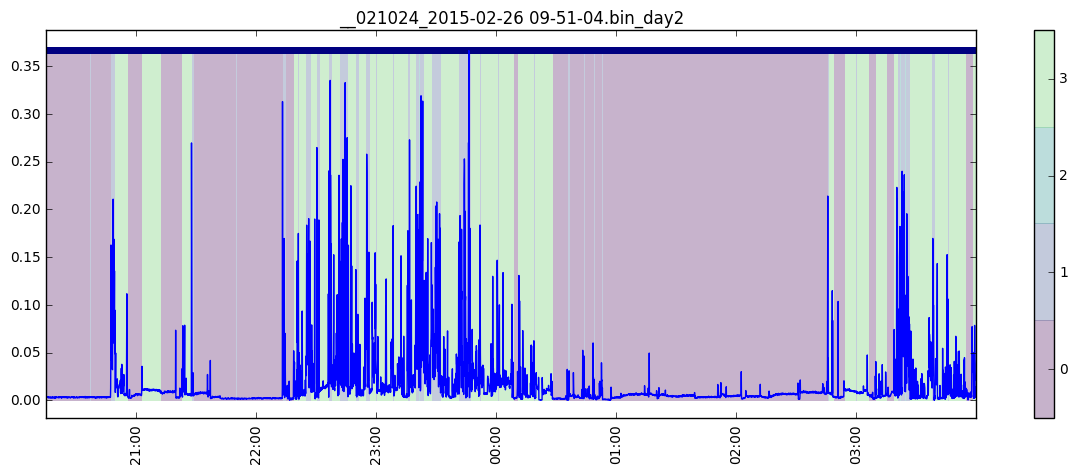

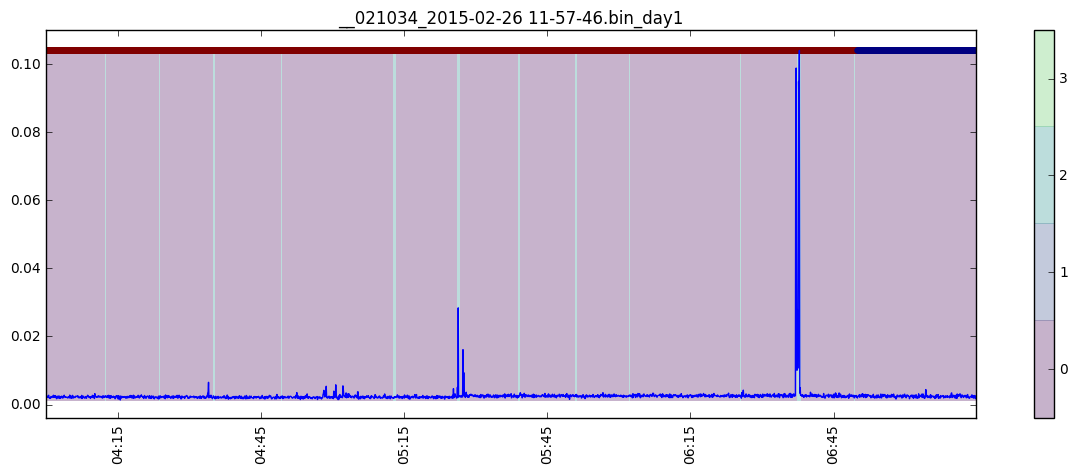

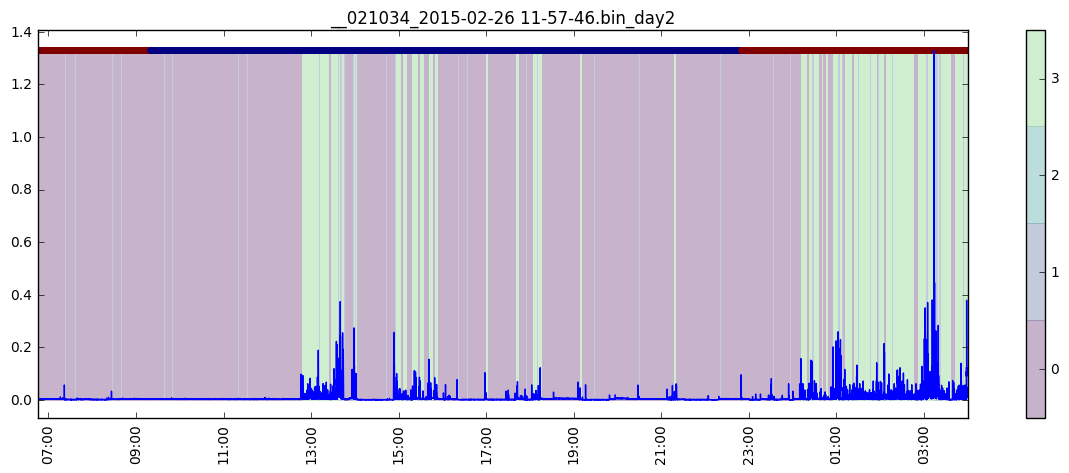

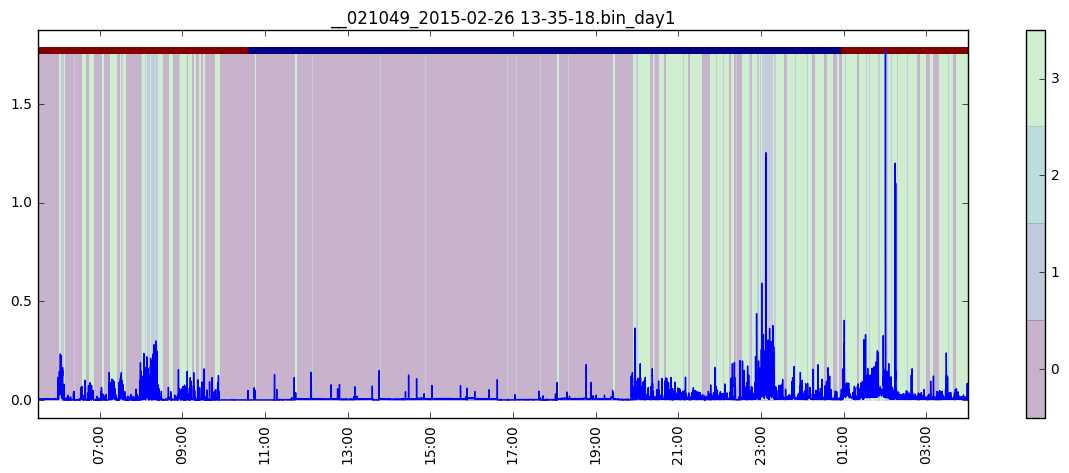

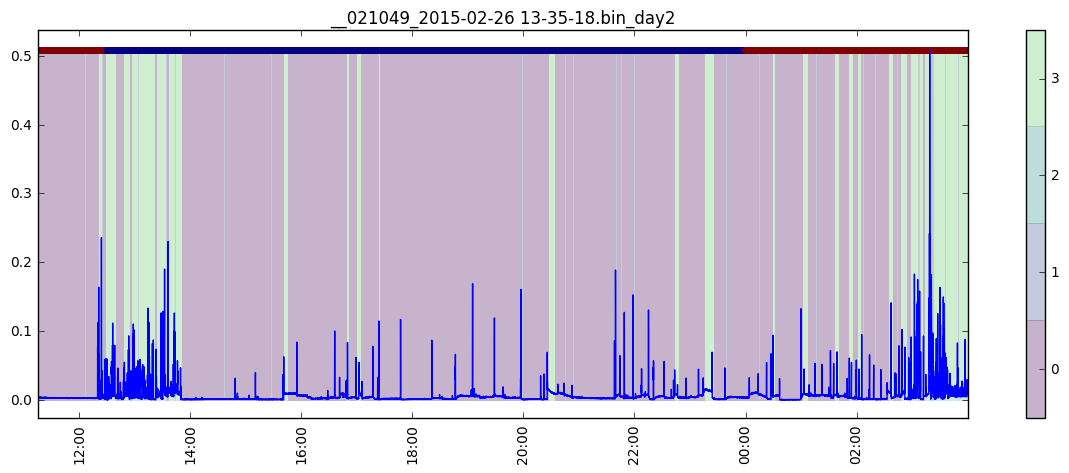

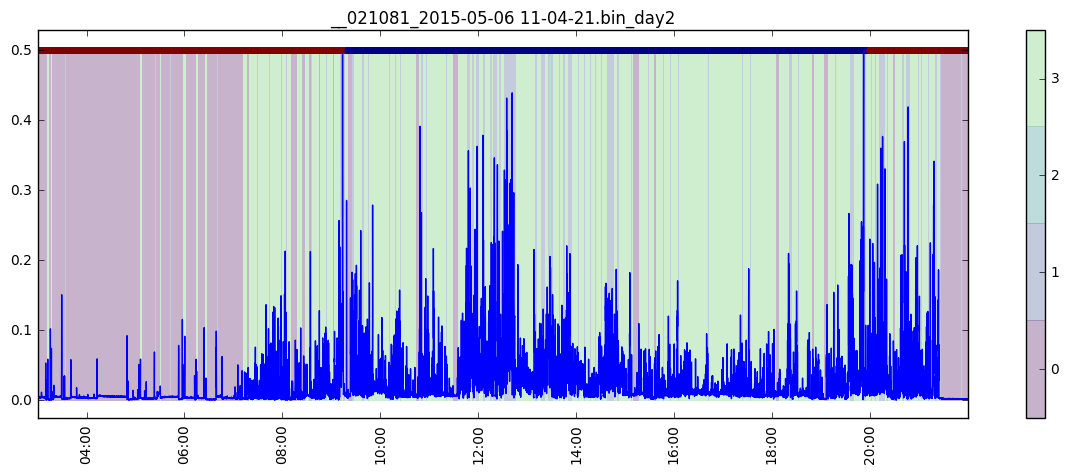

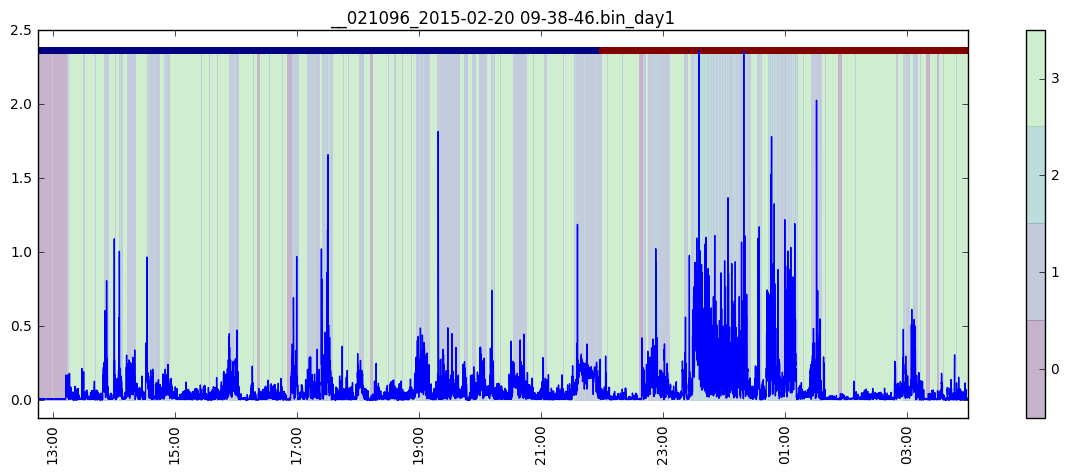

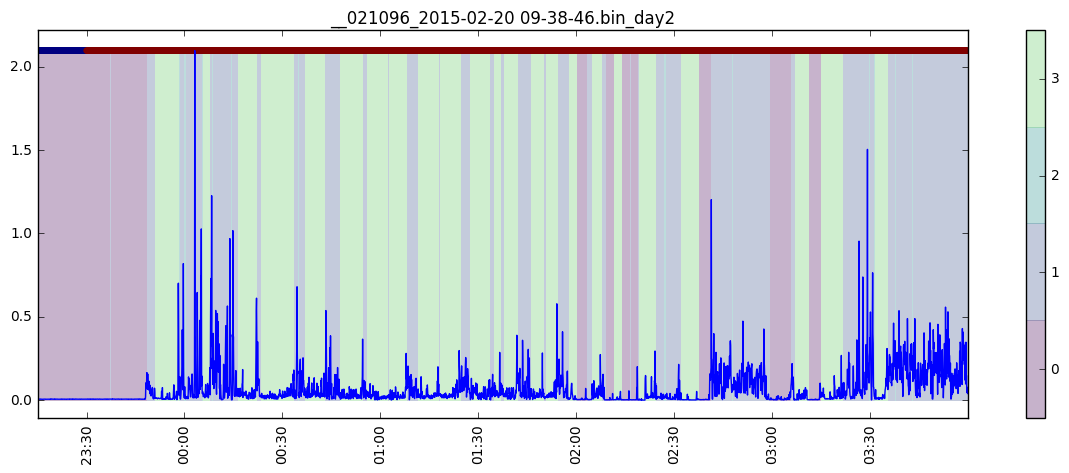

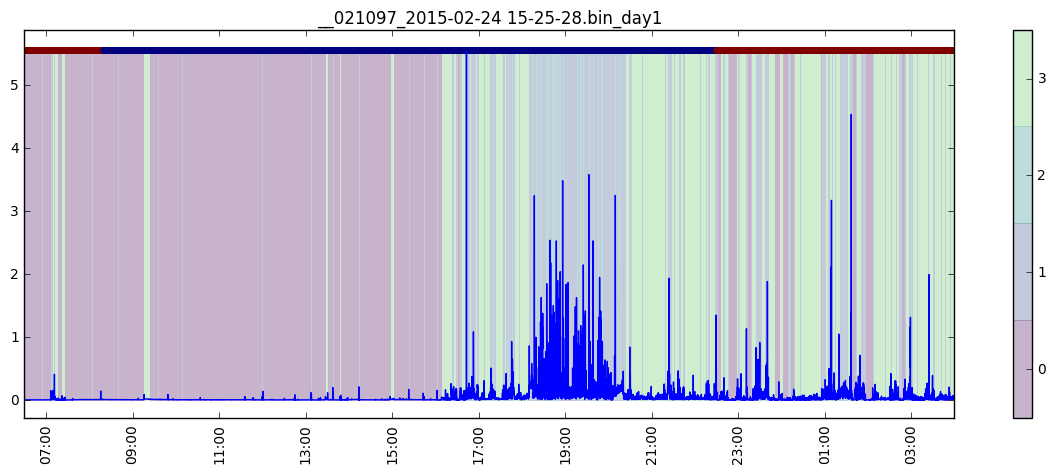

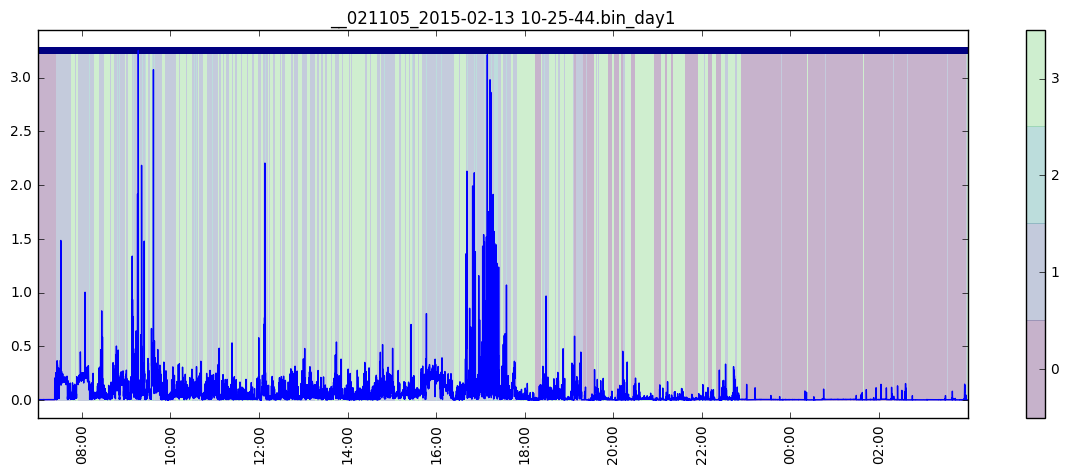

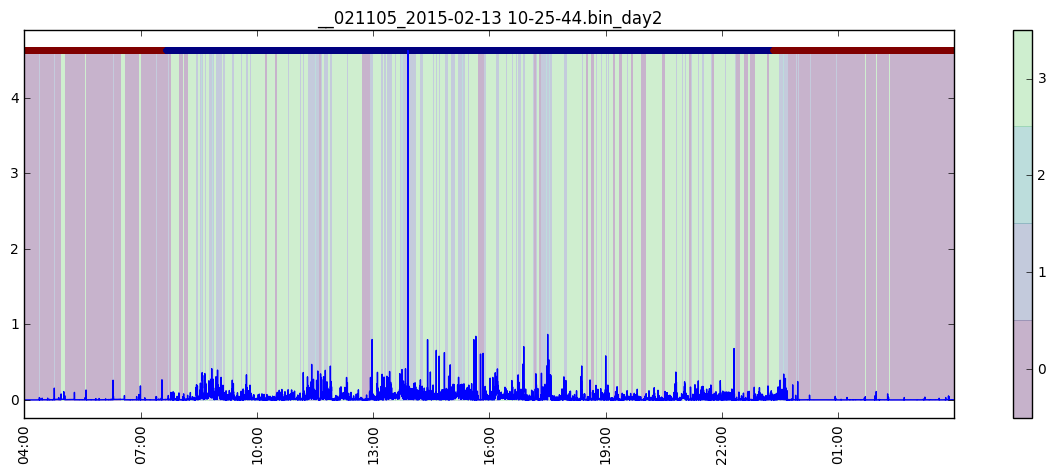

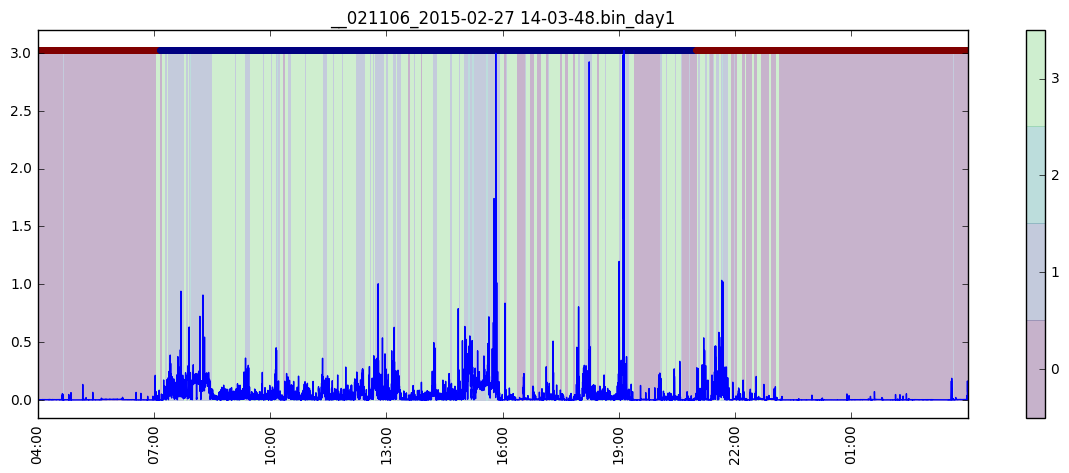

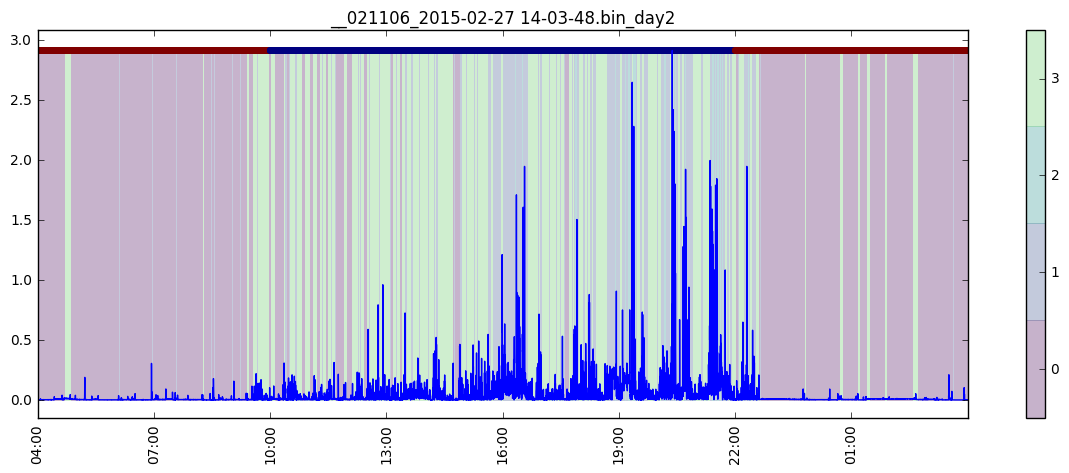

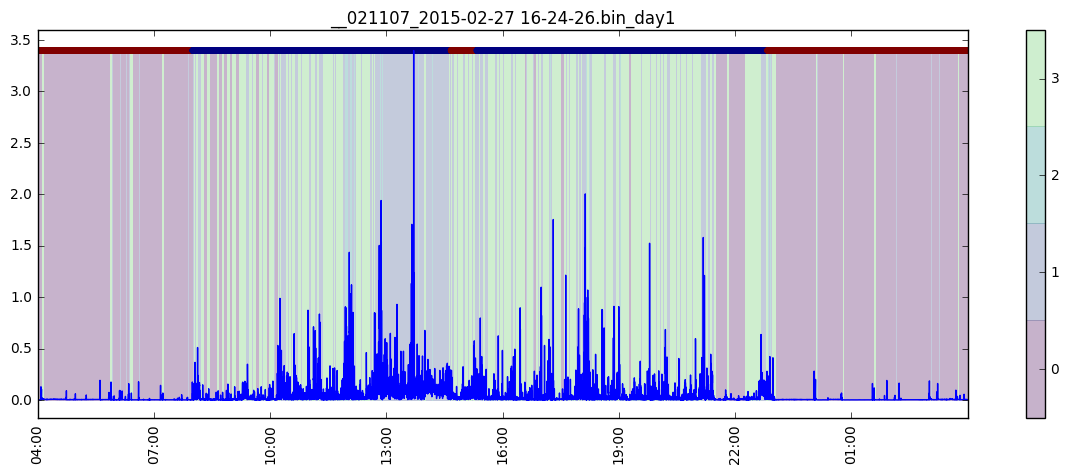

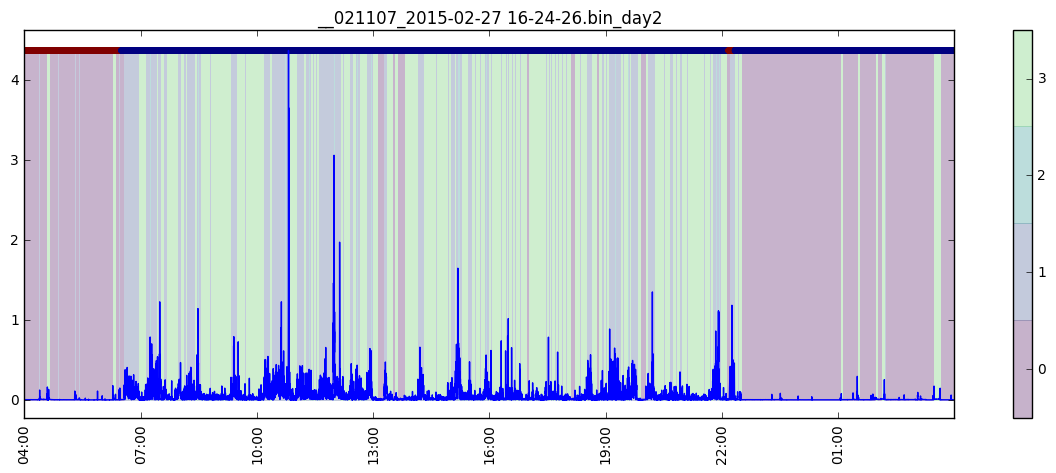

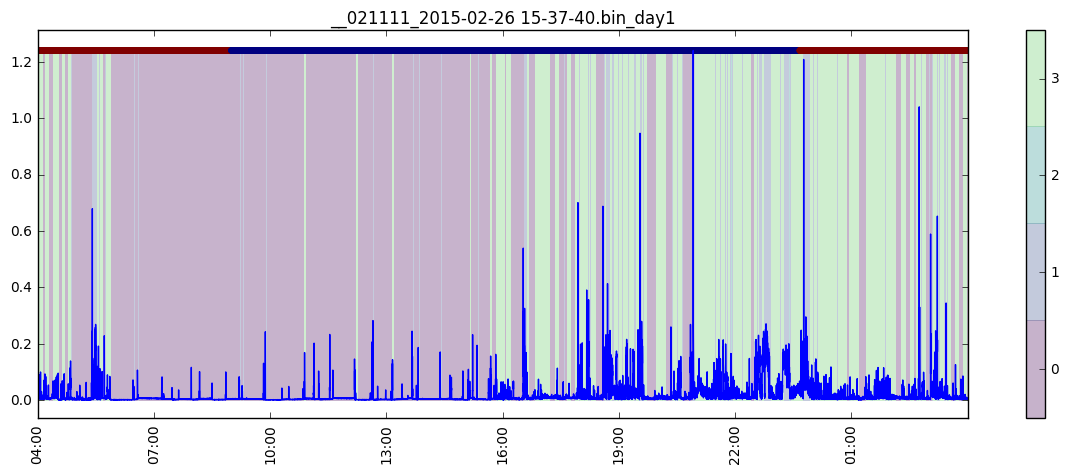

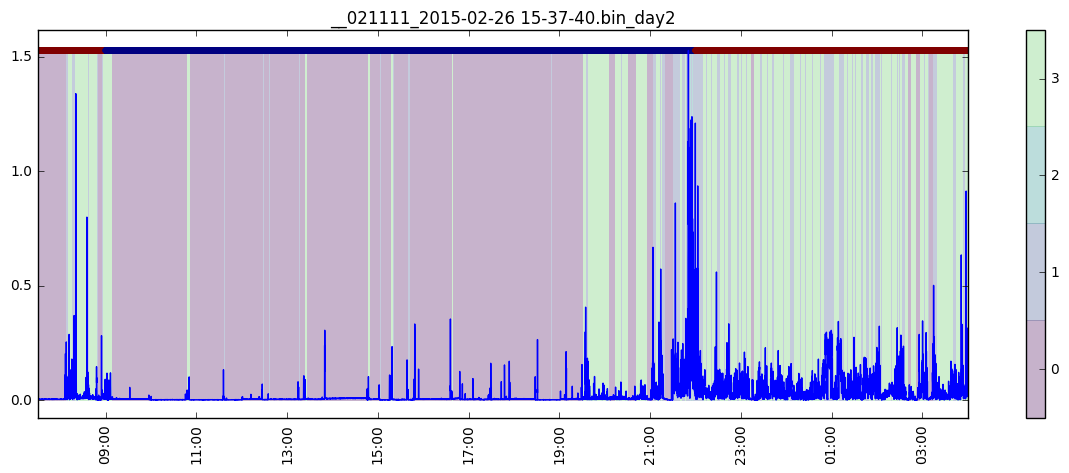

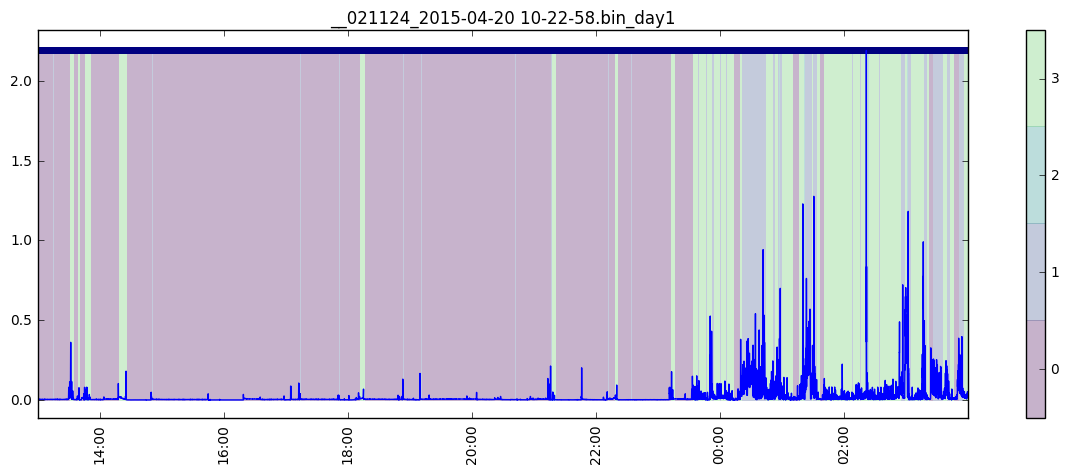

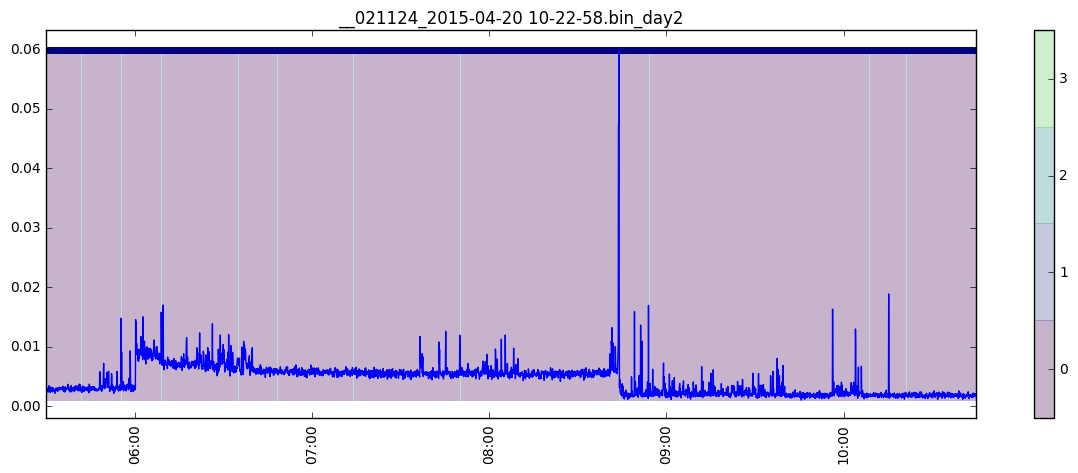

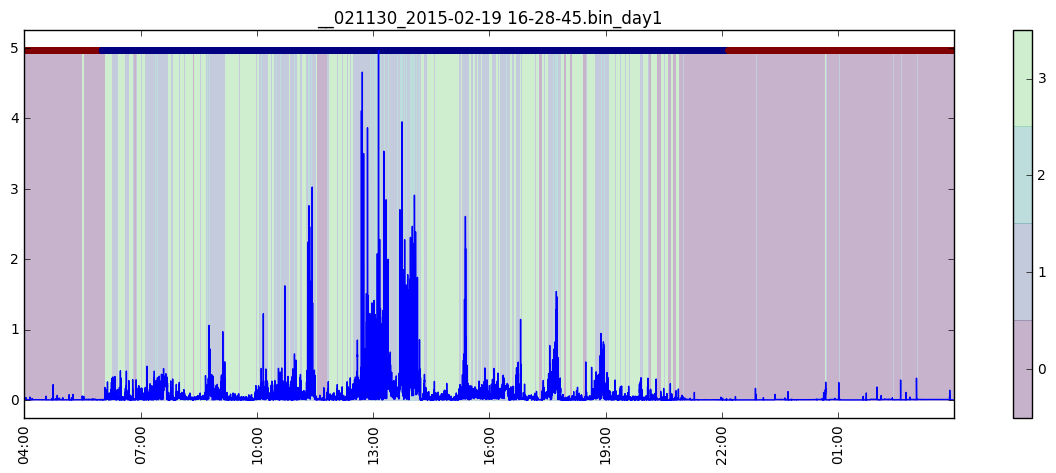

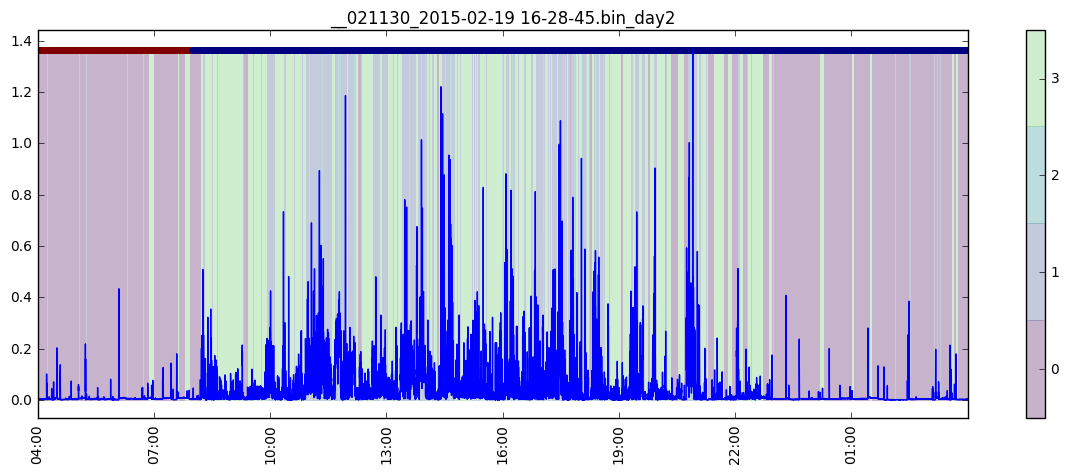

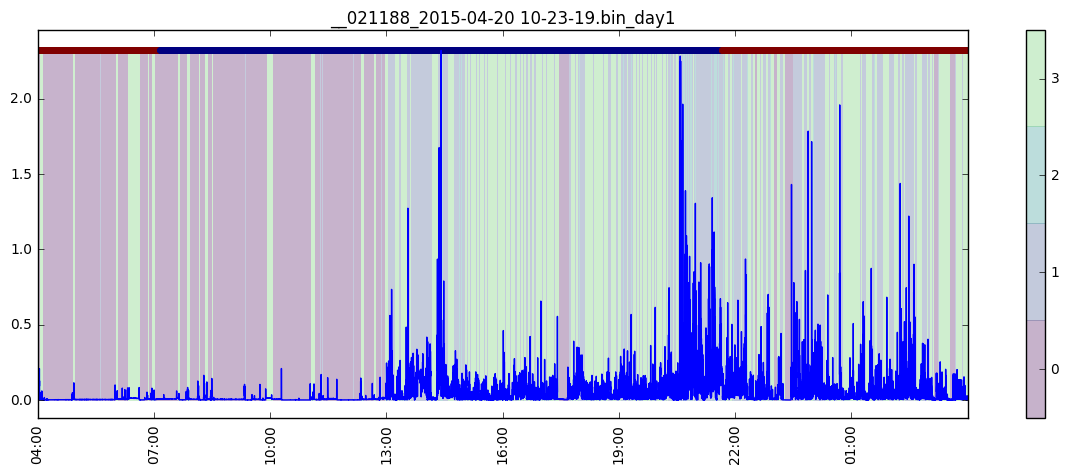

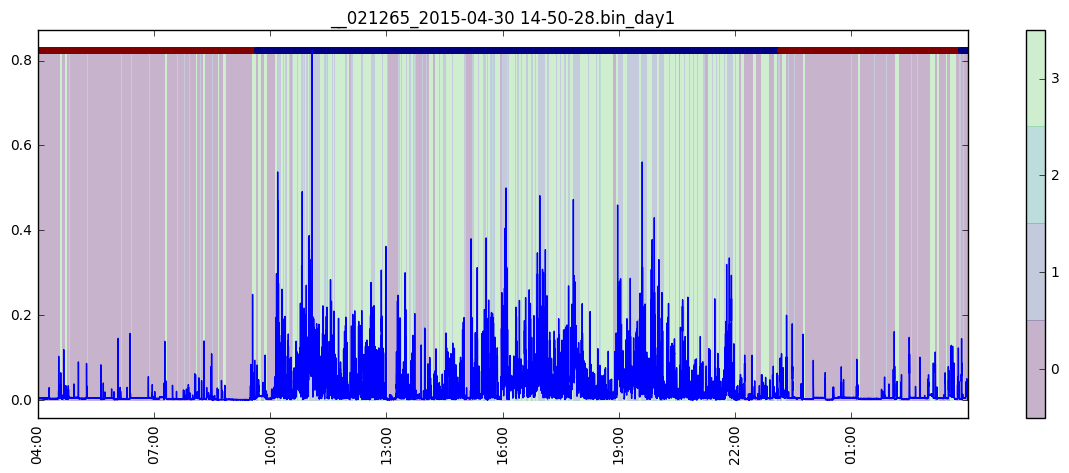

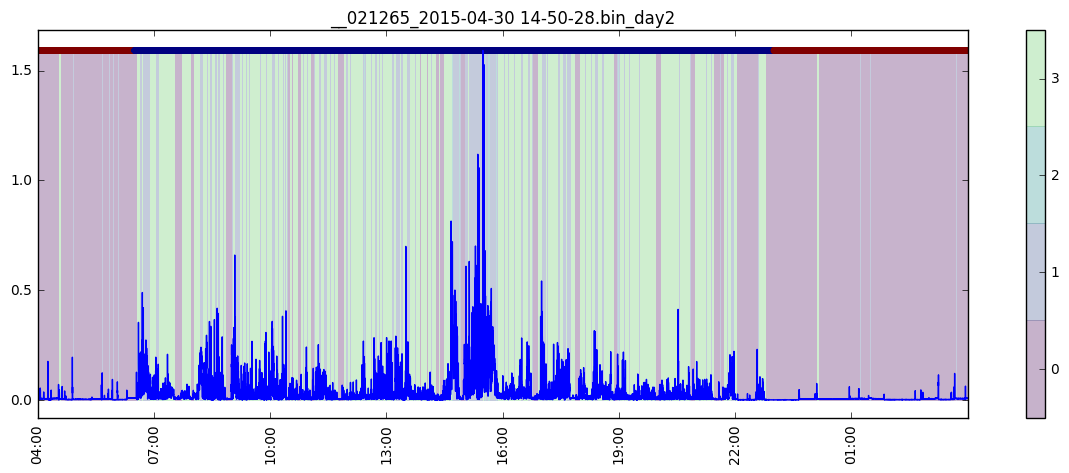

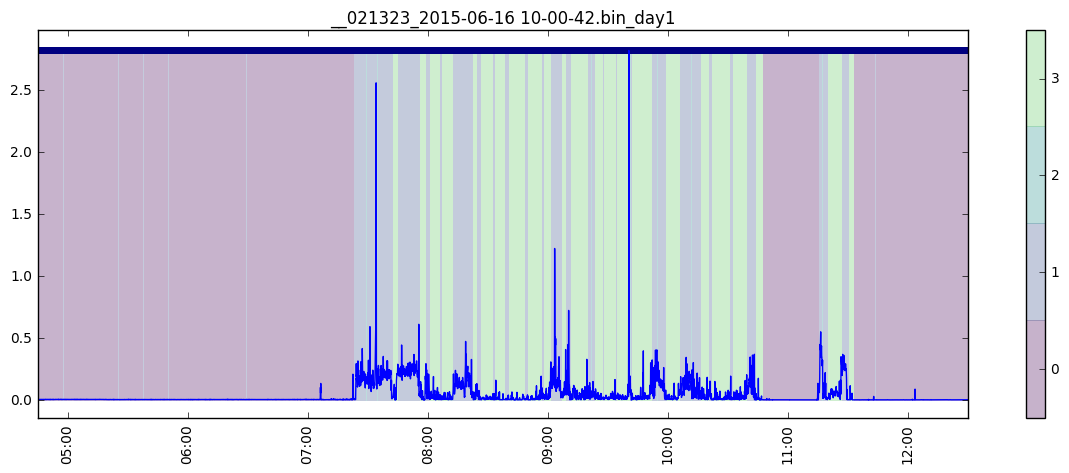

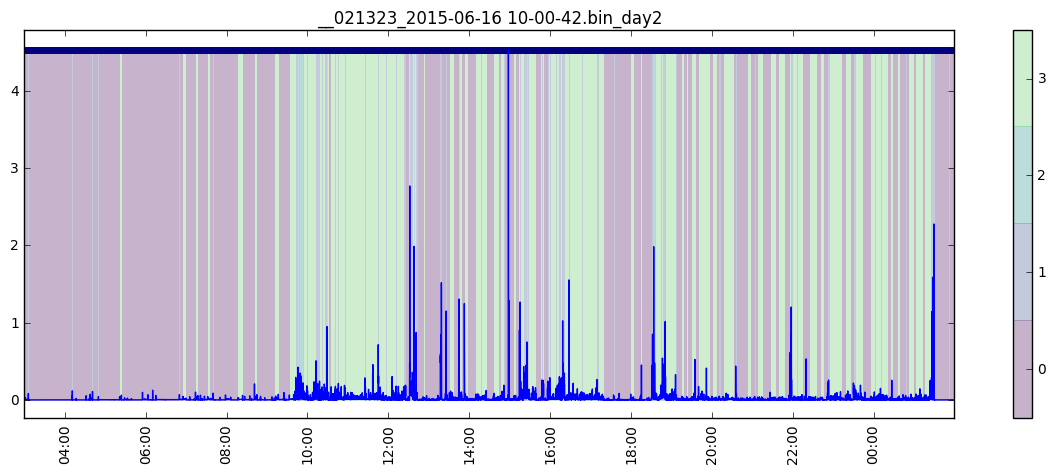

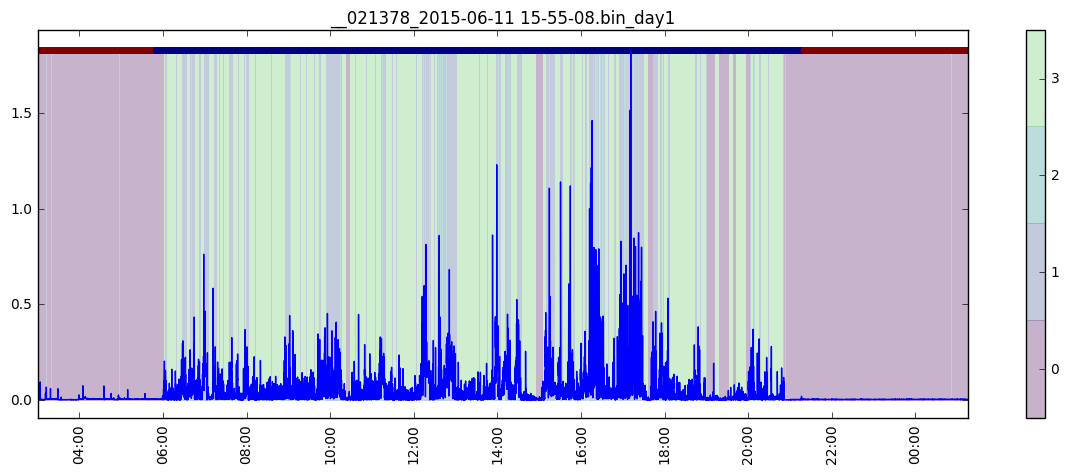

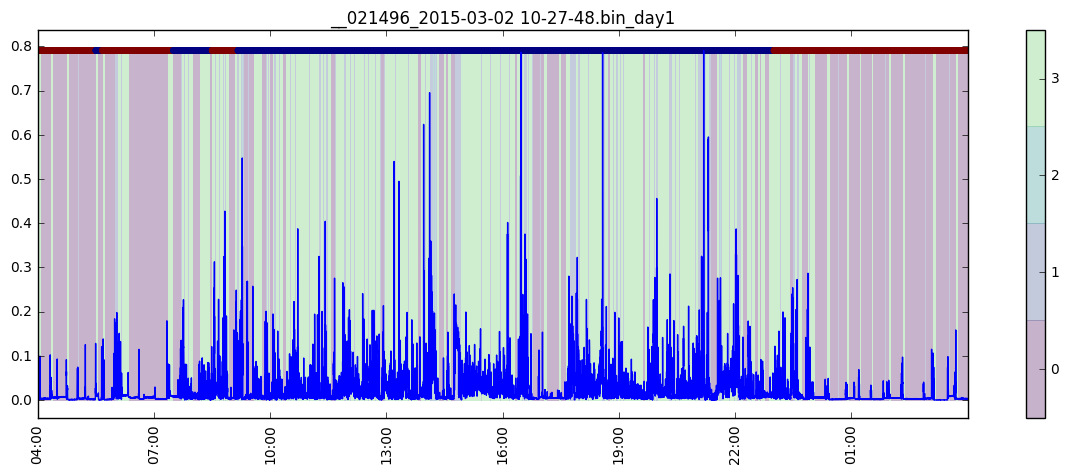

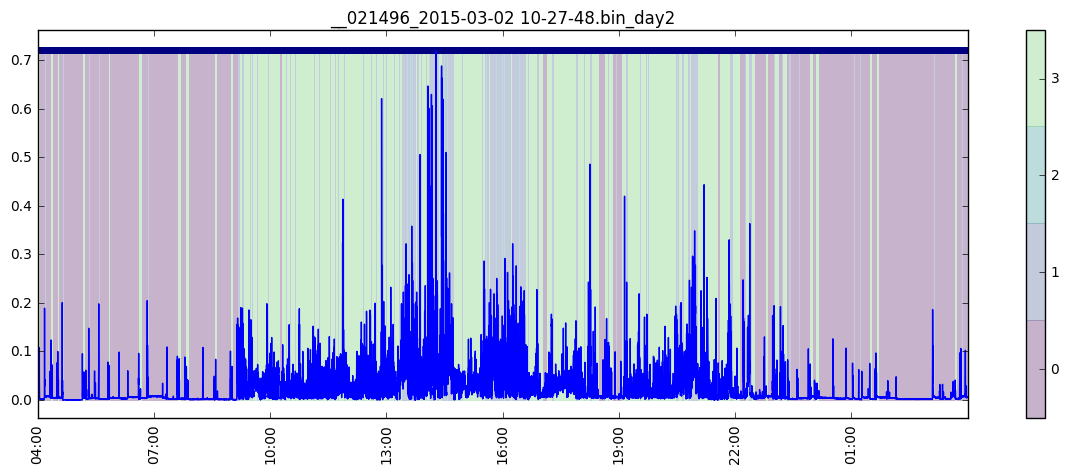

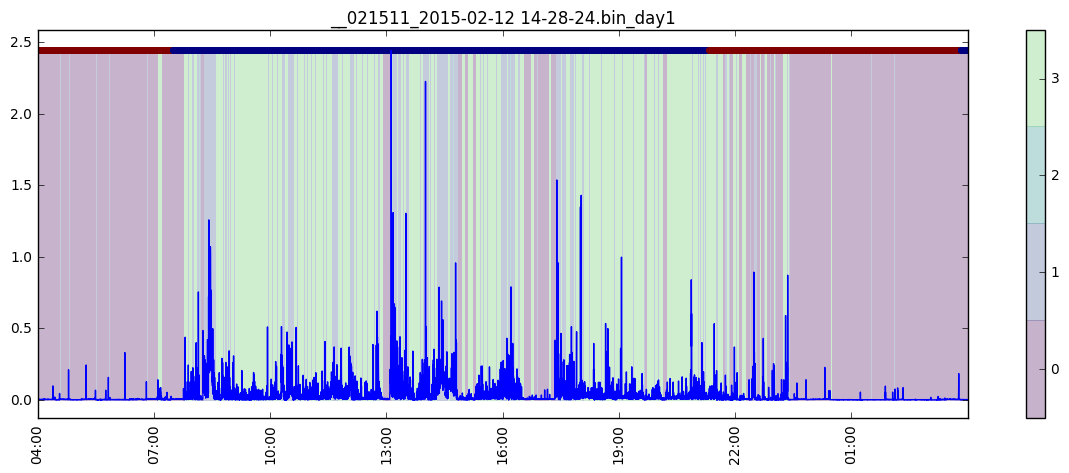

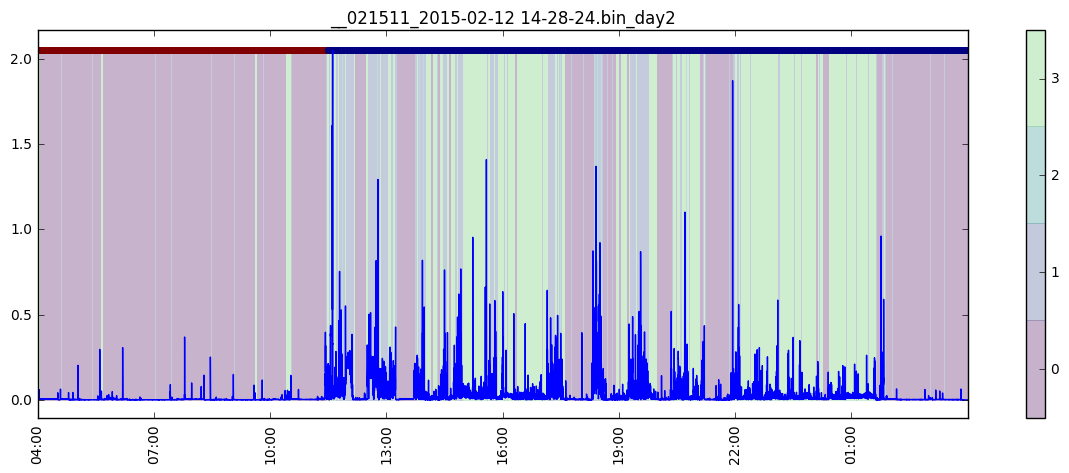

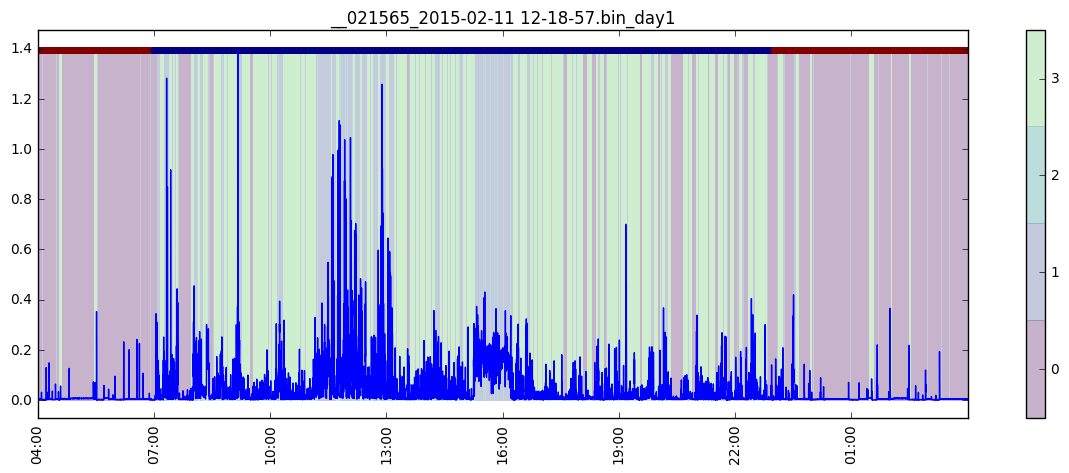

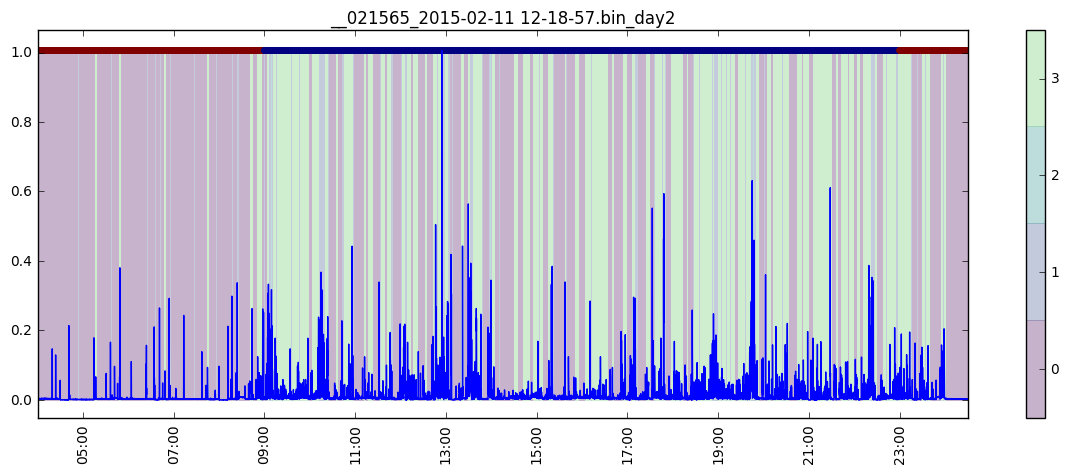

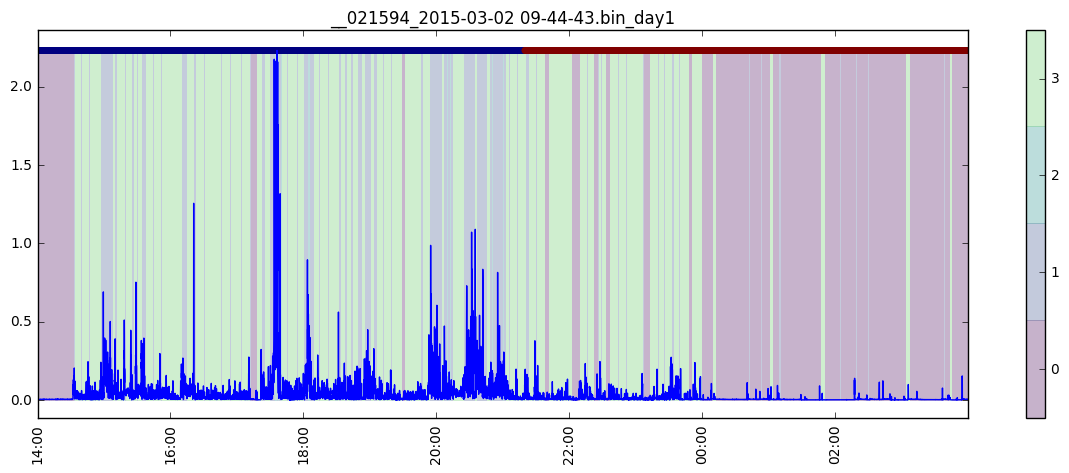

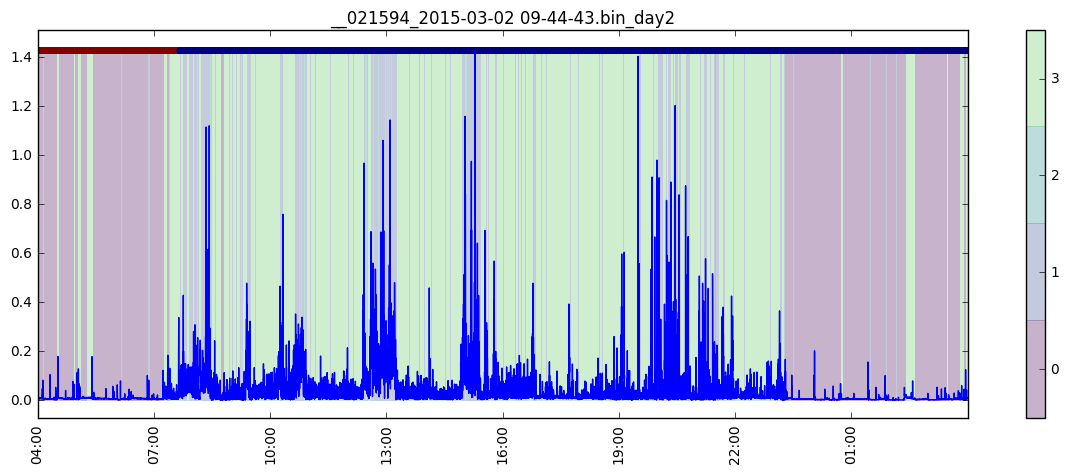

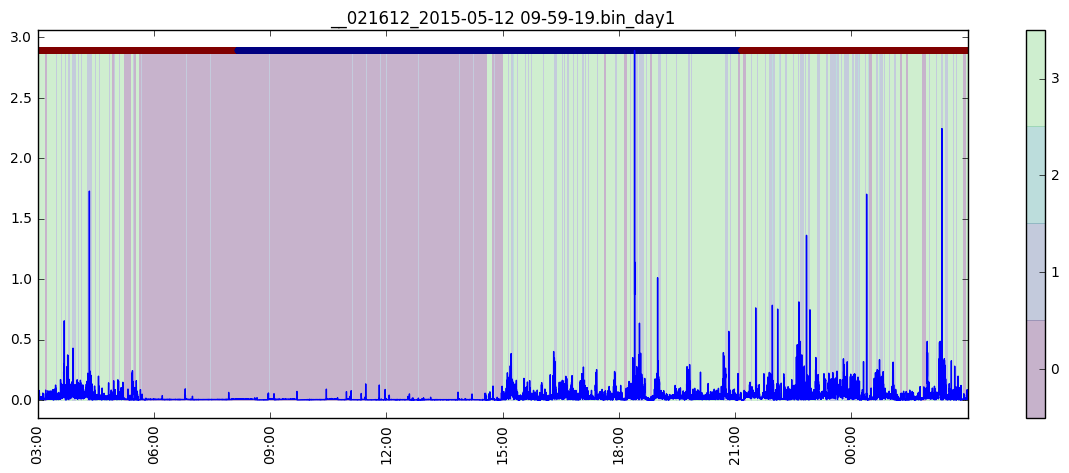

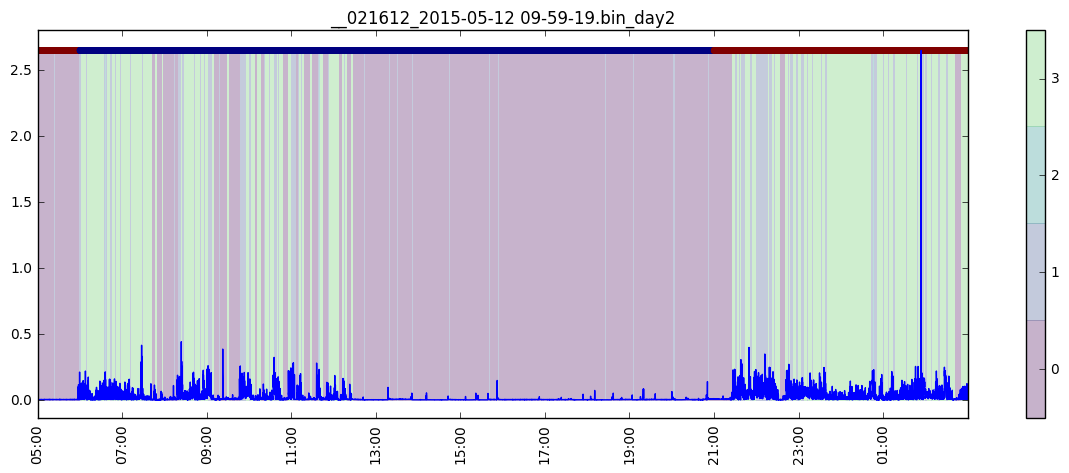

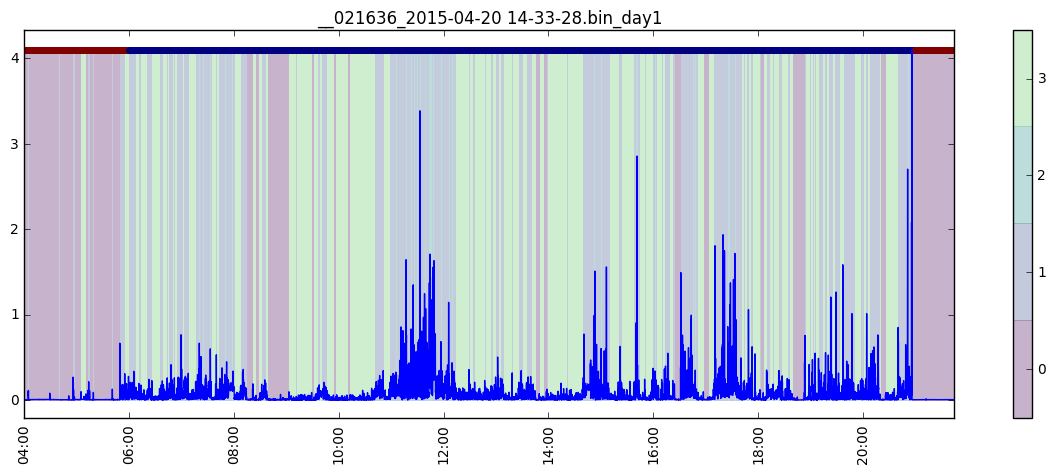

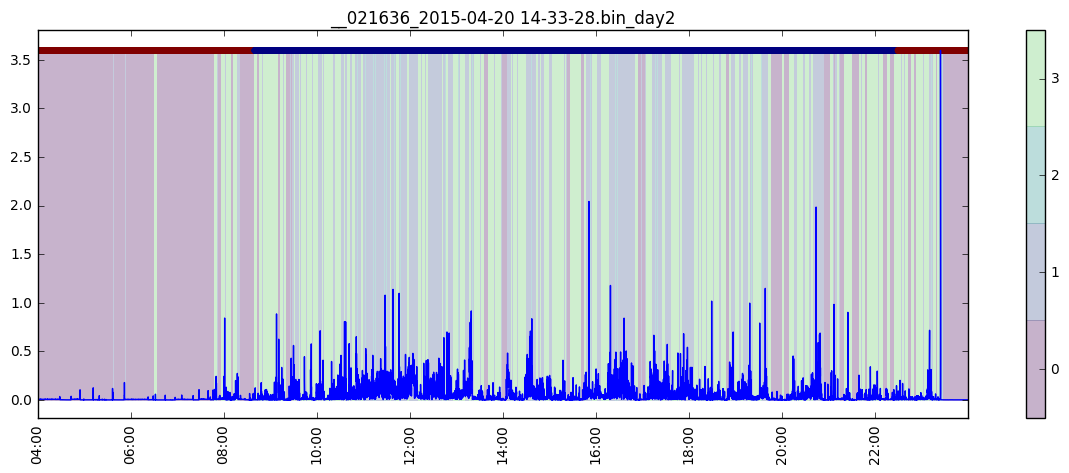

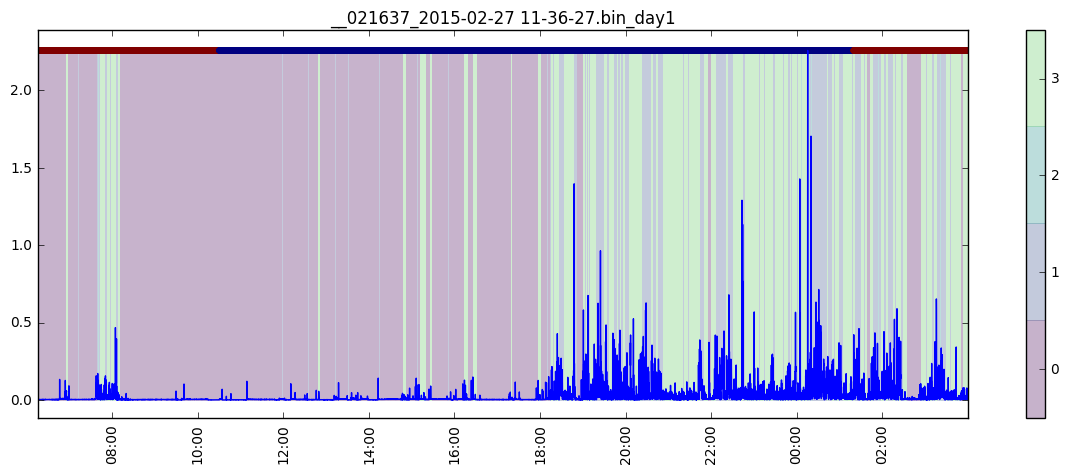

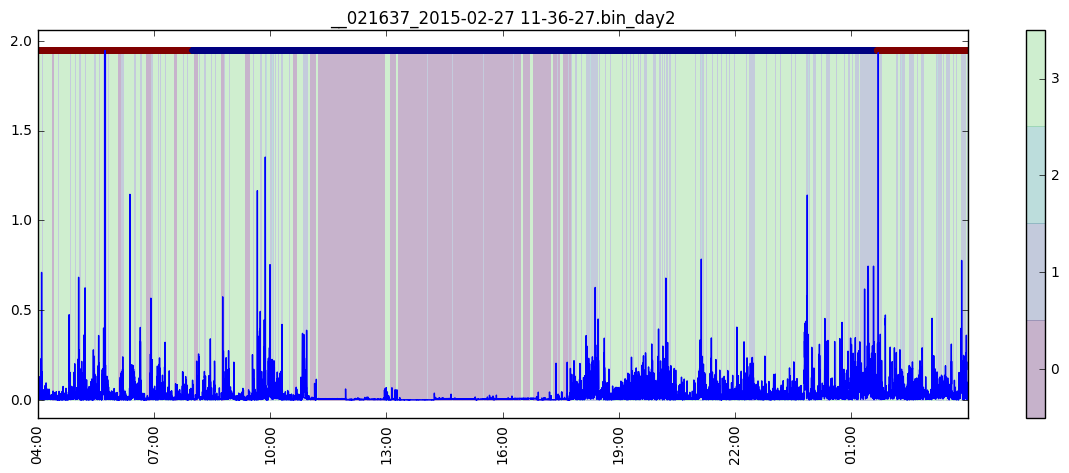

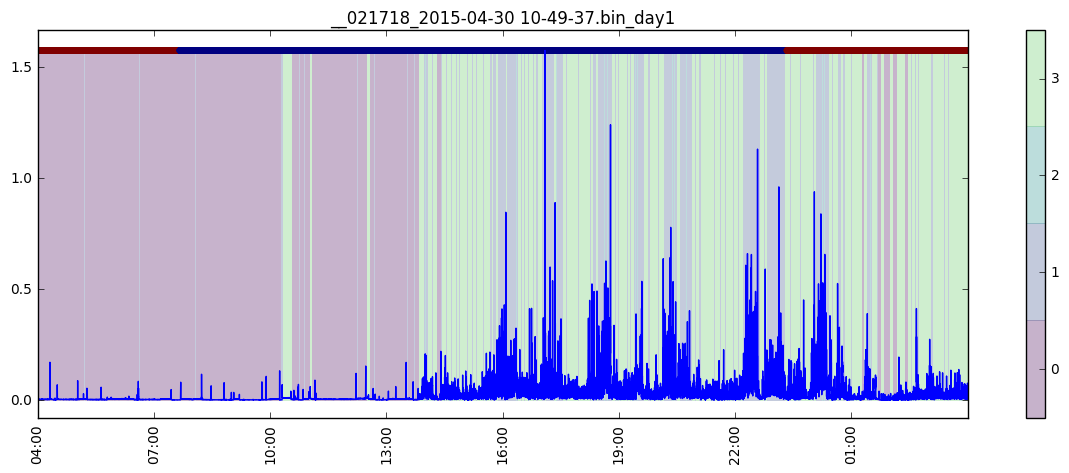

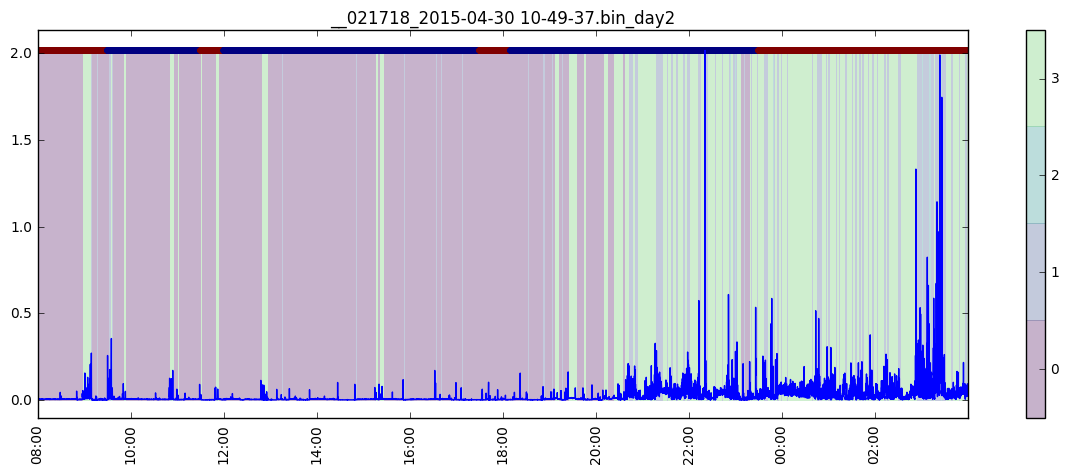

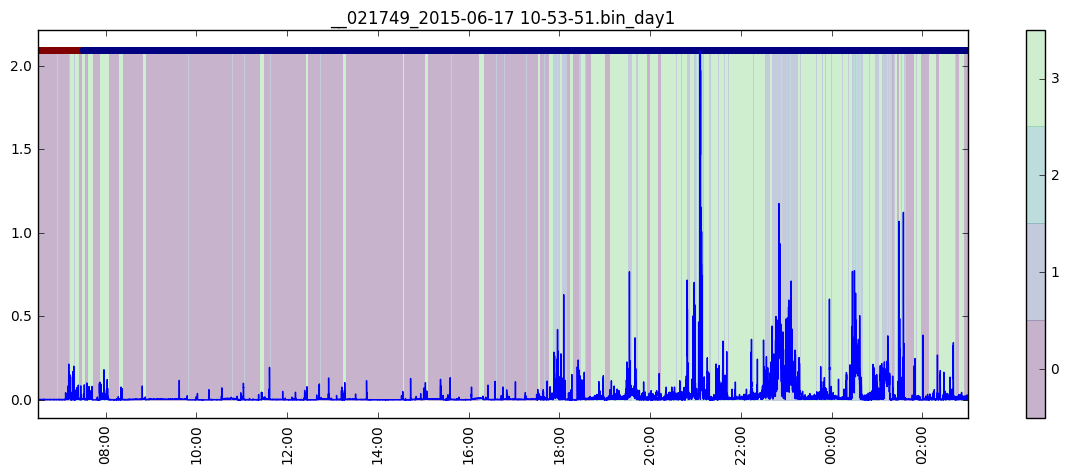

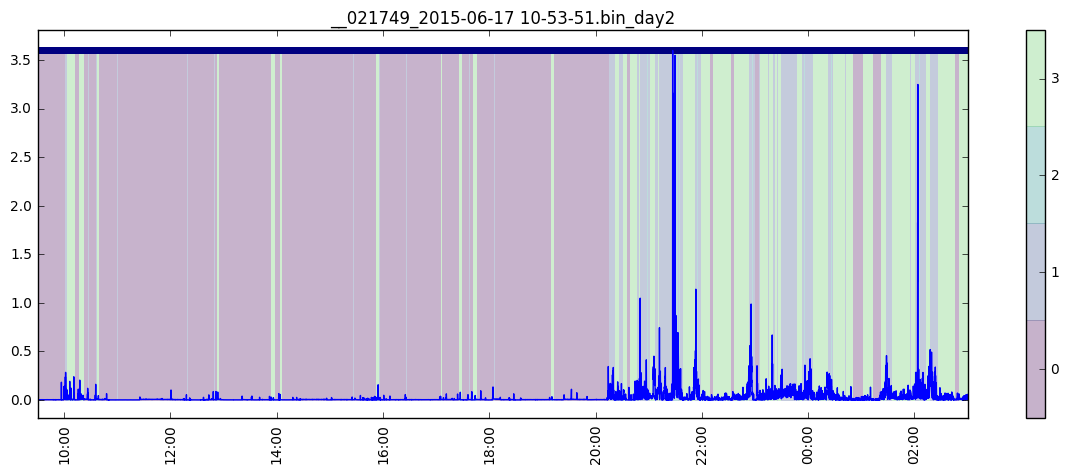

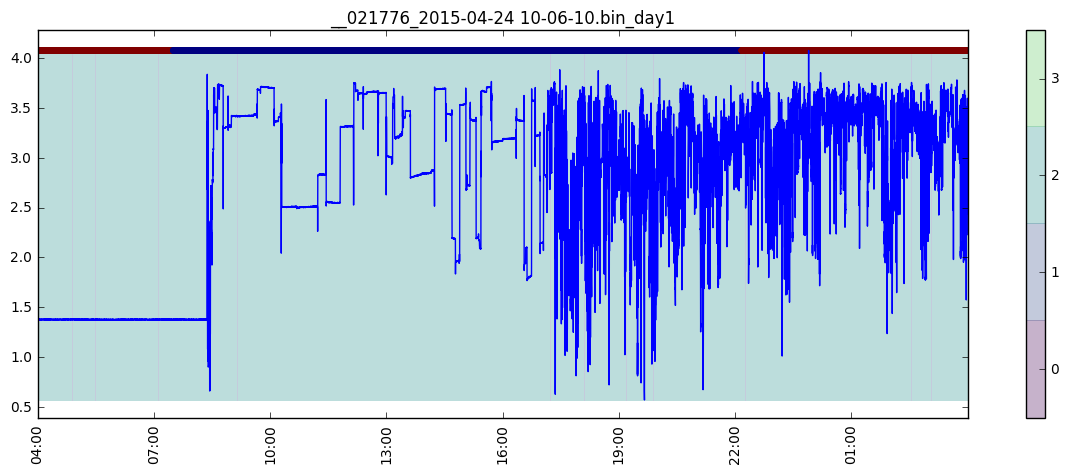

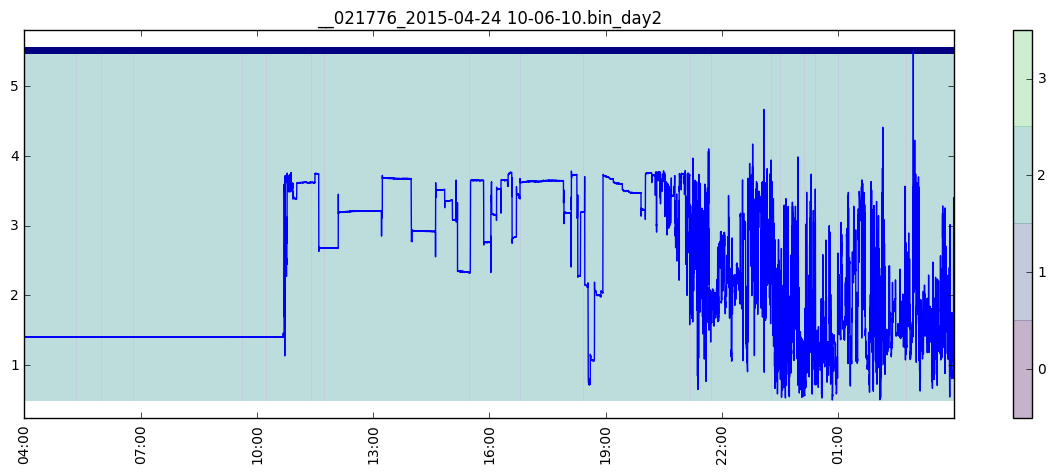

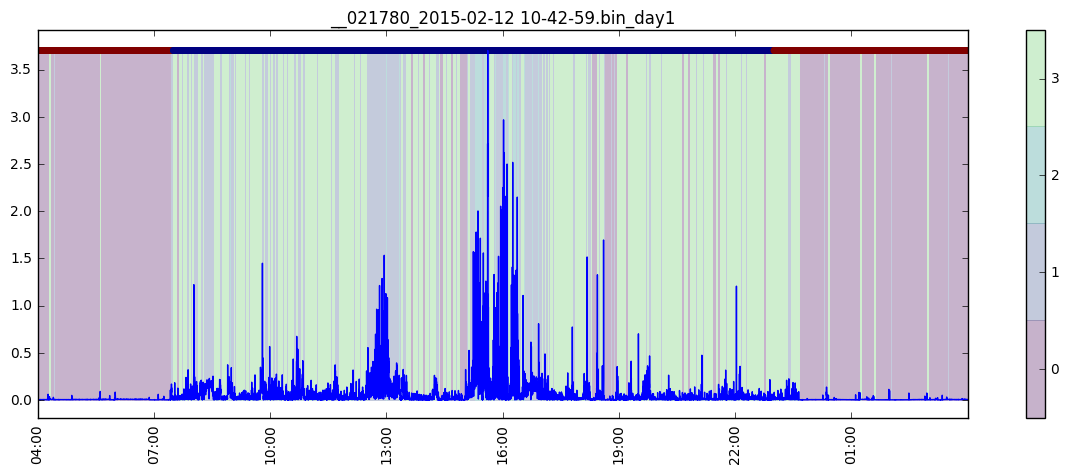

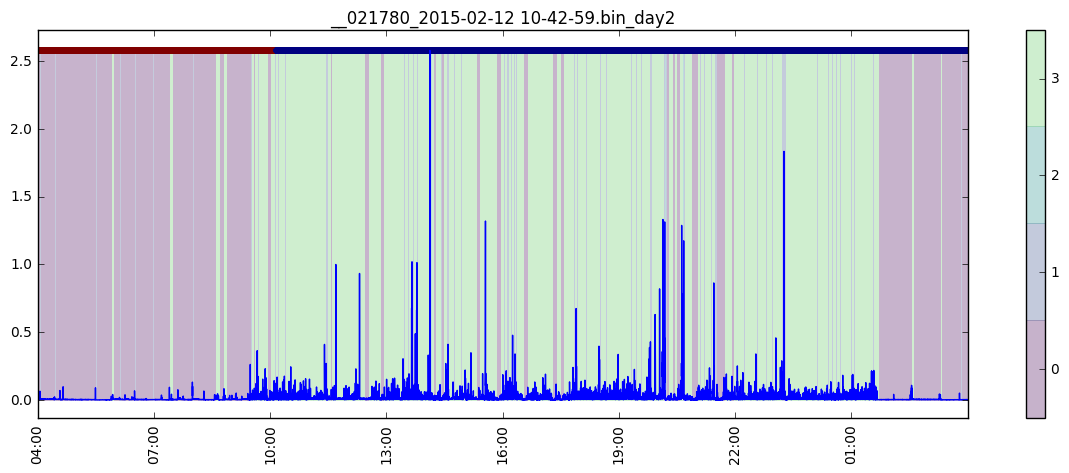

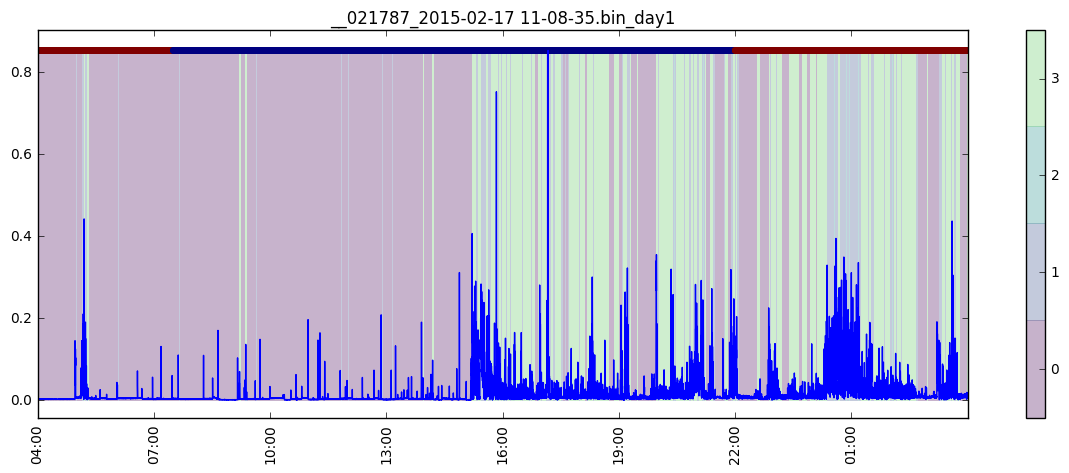

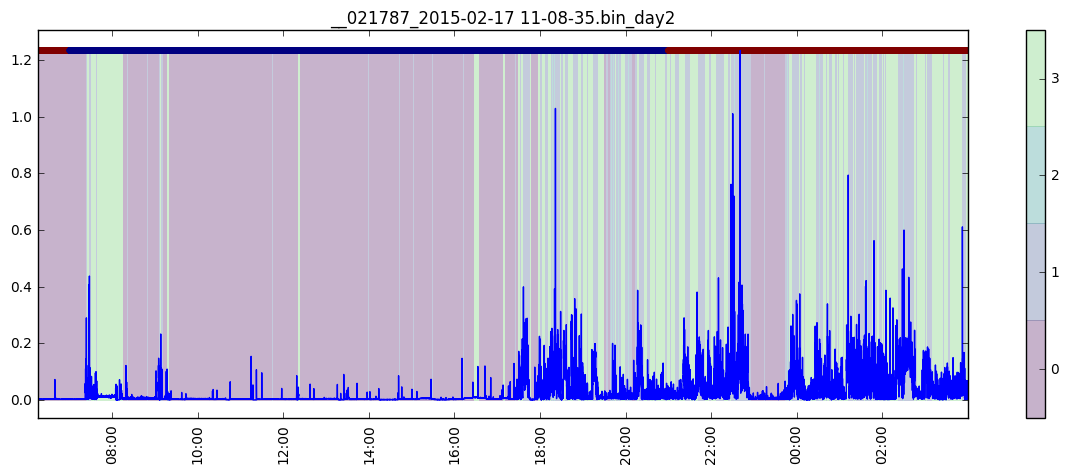

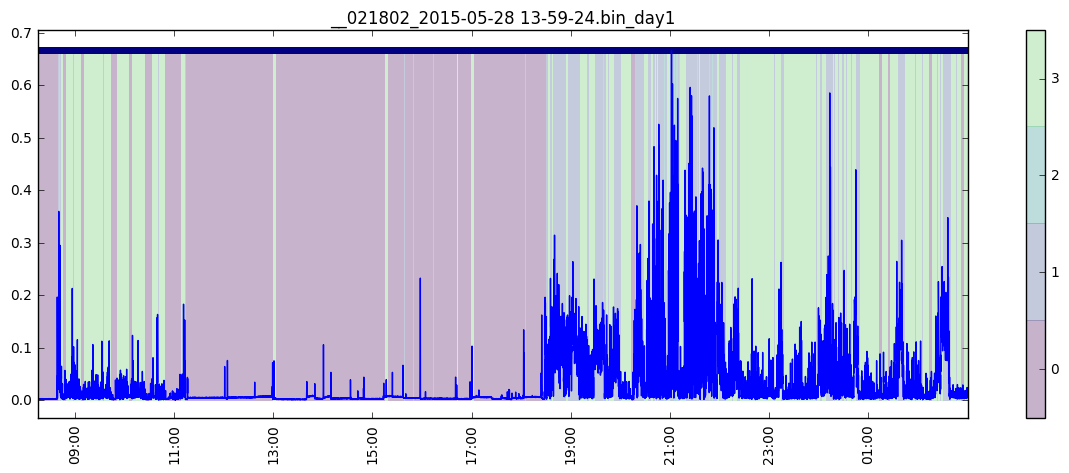

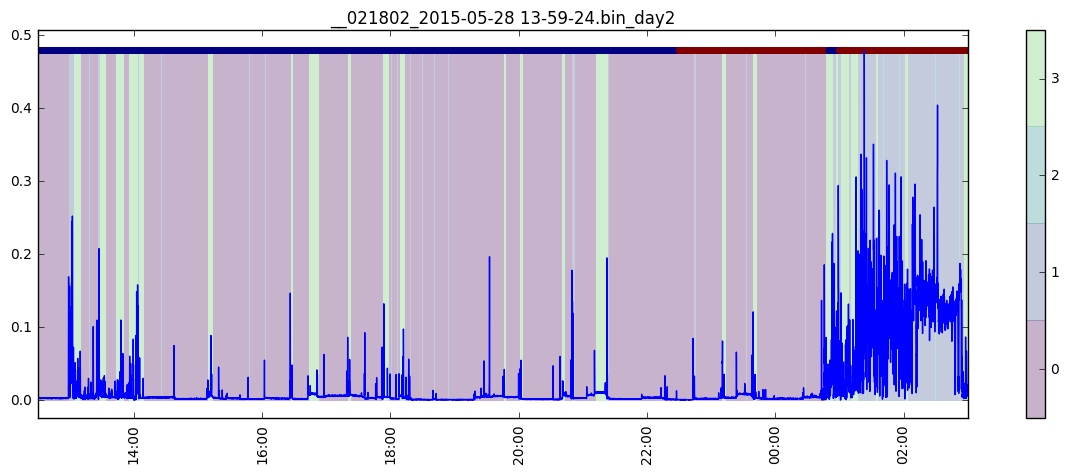

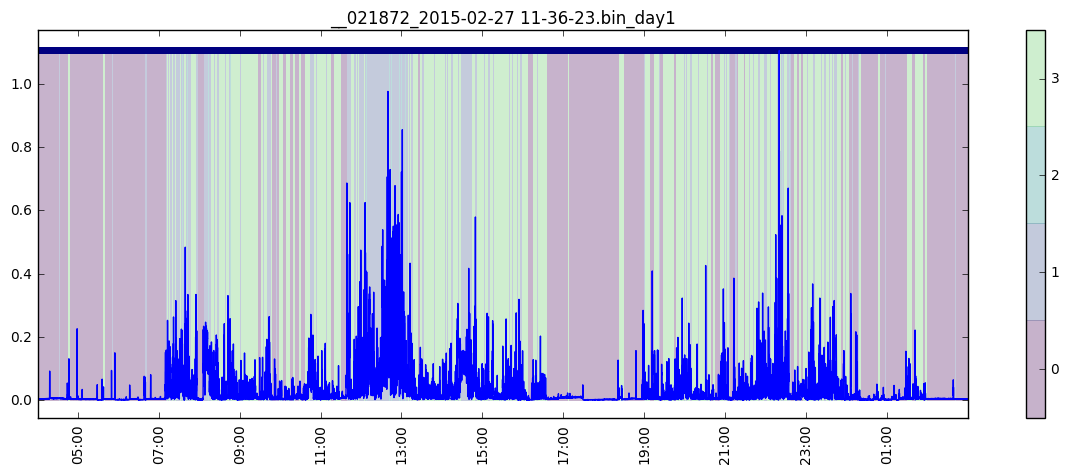

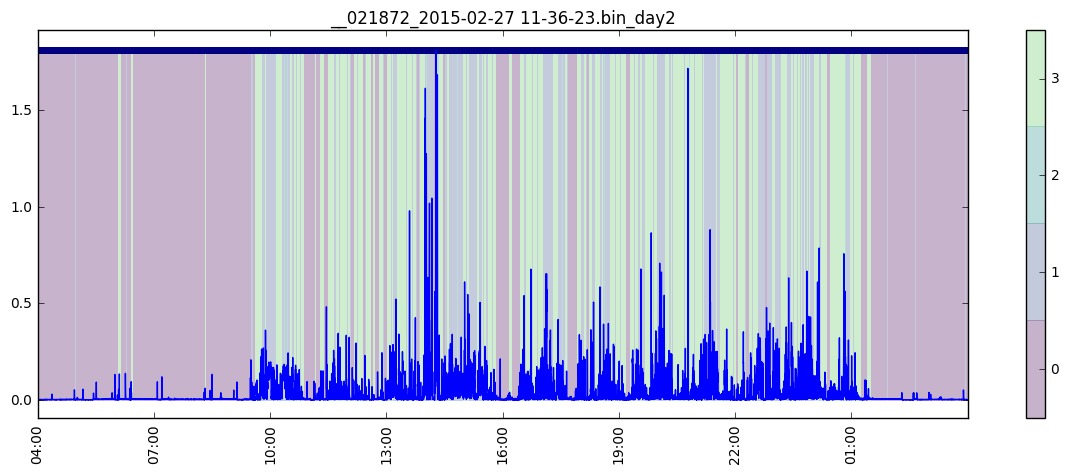

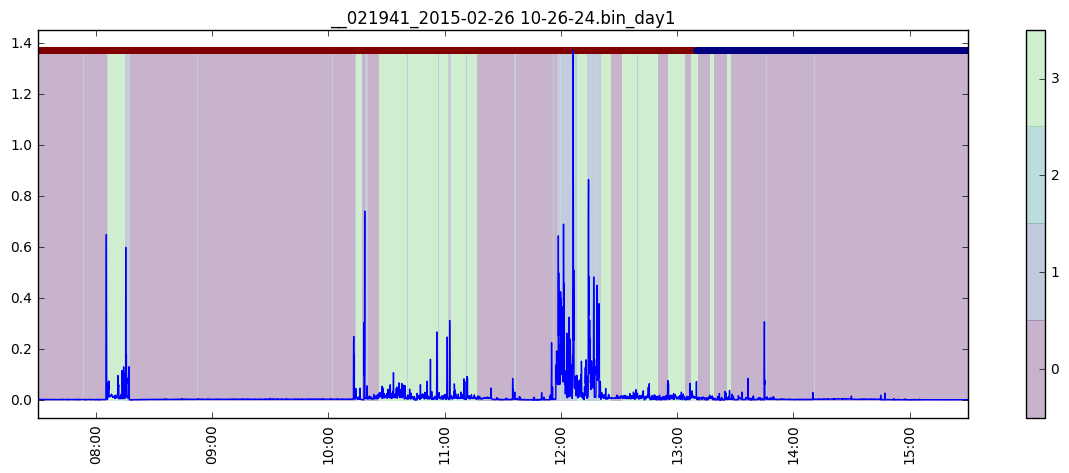

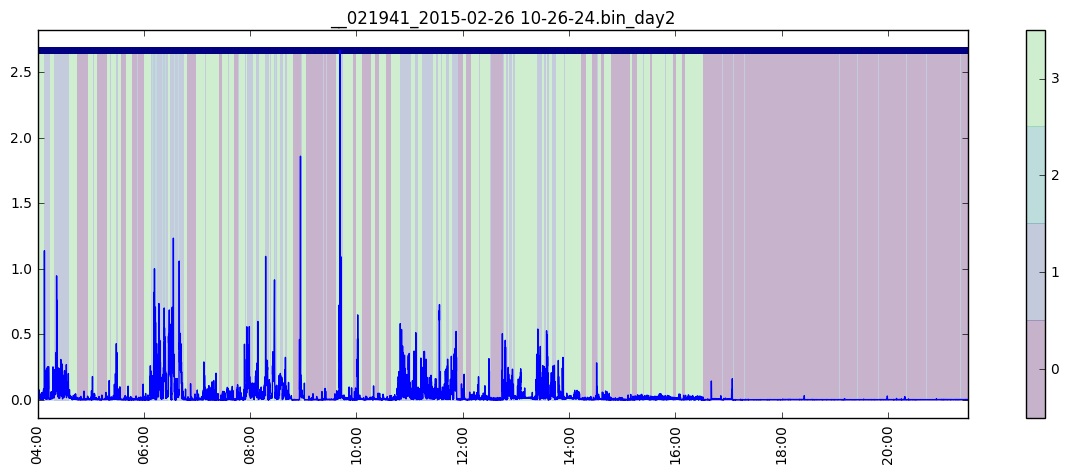

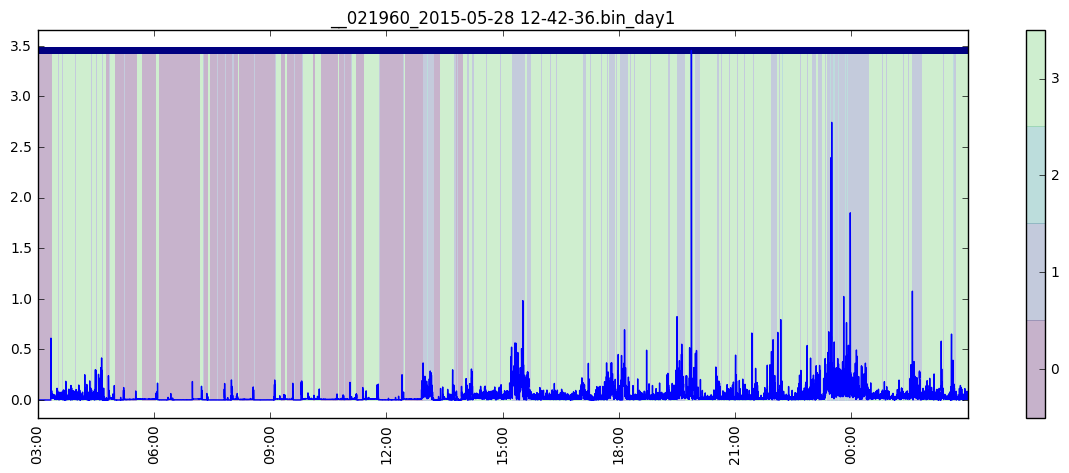

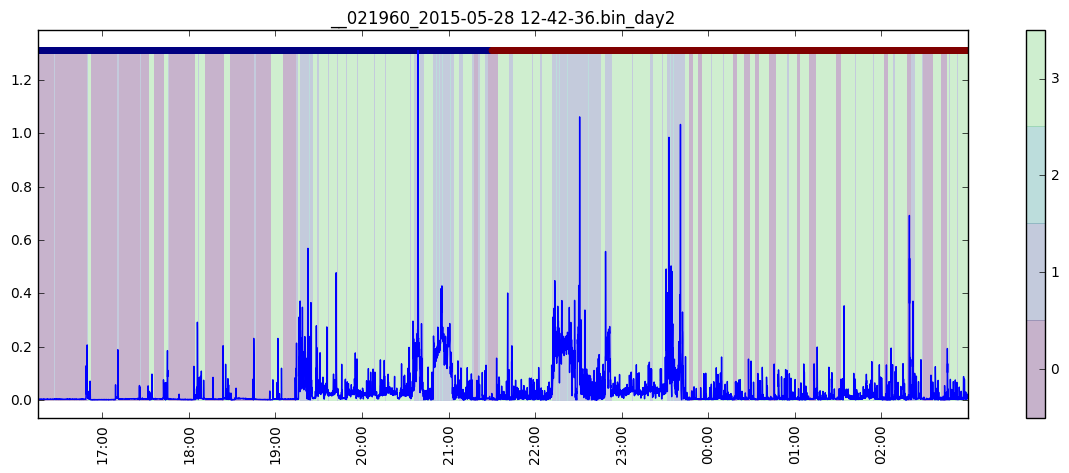

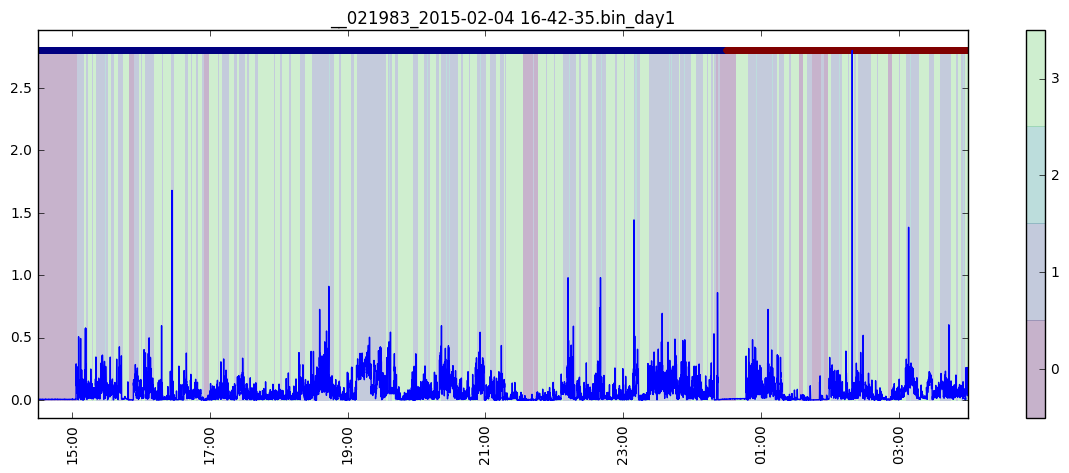

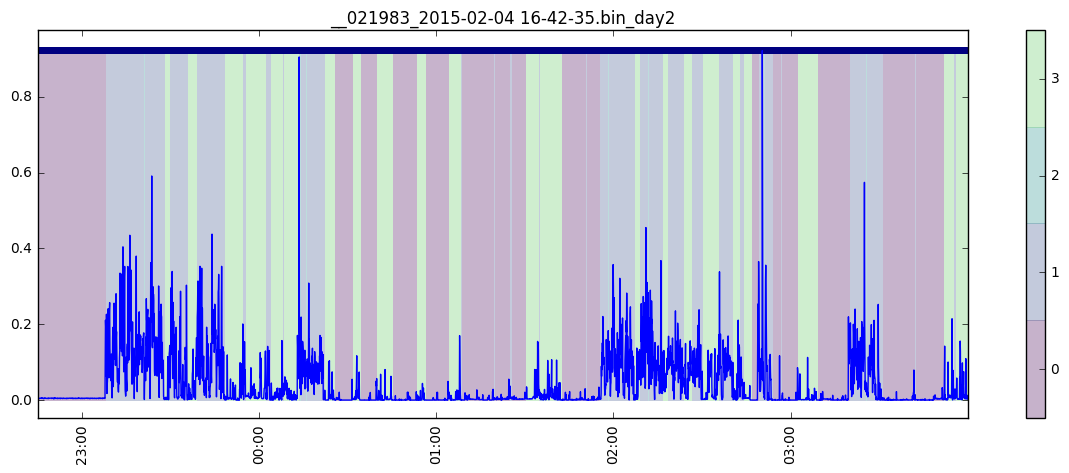

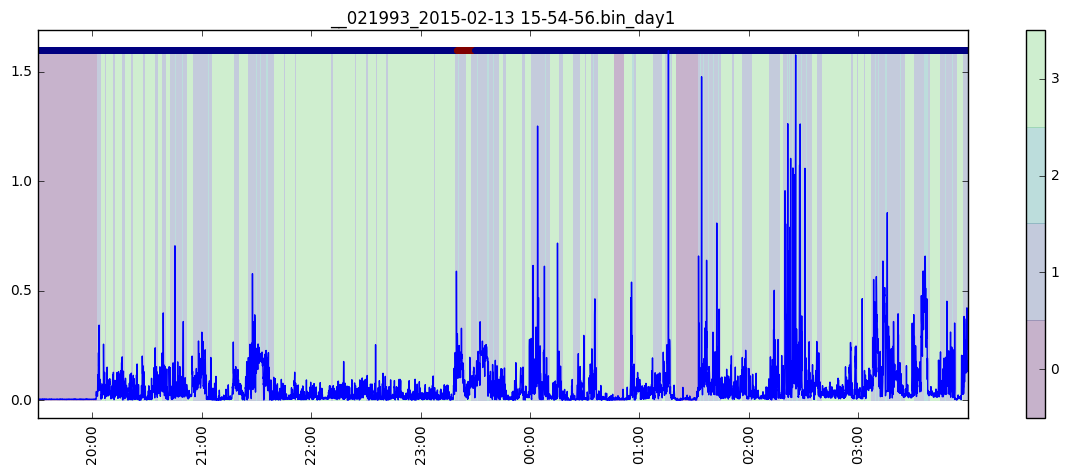

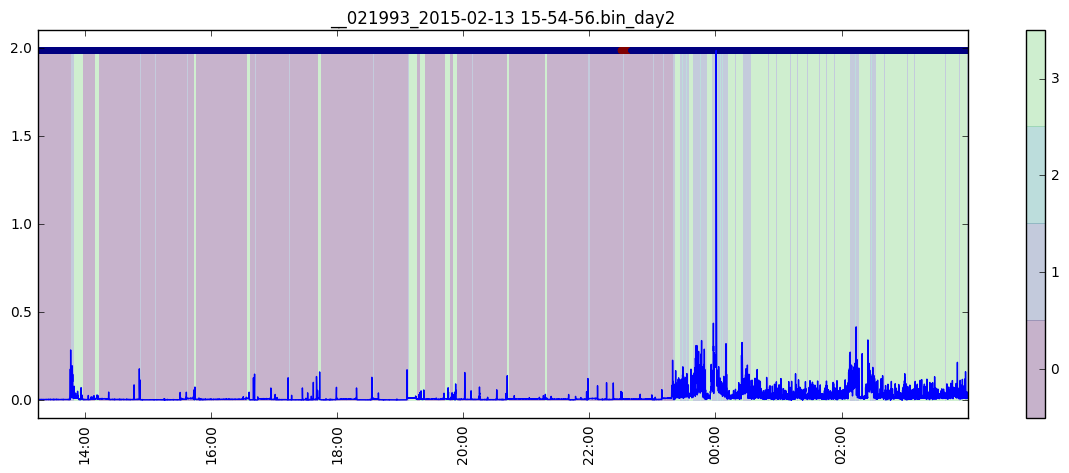

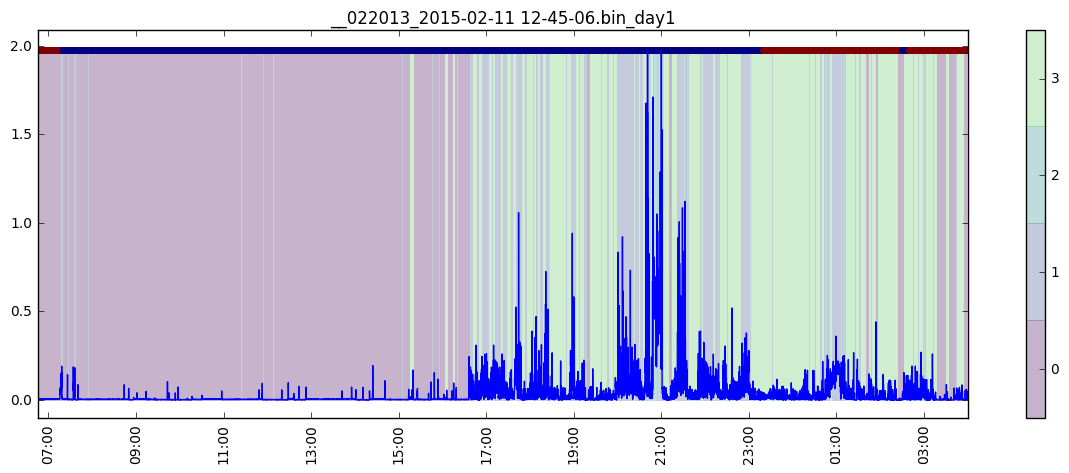

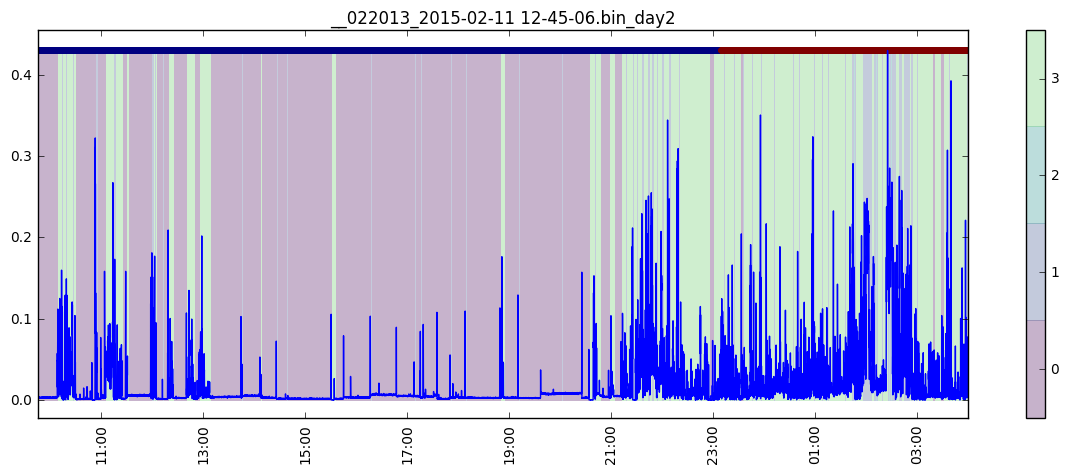

In [22]:
nr_datasets = len(datasets)

for i in range(nr_datasets):
    dat = datasets[i]
    dat['sleep'] = [1*(d==1) for d in dat['act']]
    fig, ax = hsmm.plot_states_and_var_new(dat, dat['state'], columns=['acceleration',], by='sleep', cmap=cmap_states)
    ax.set_title(dat['filename'][0])
    plt.show()